<!-- hide -->
# Logistic regression - Step by step guide
<!-- endhide -->

- Understand a new dataset.
- Process it by applying exploratory data analysis (EDA).
- Model the data using logistic regression.
- Analyze the results and optimize the model.

## 📝 Instructions

### Banking Marketing Campaign

**Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `bank-marketing-campaign-data.csv`. You can load it into the code directly from the link (`https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv`) or download it and add it by hand in your repository. In this dataset you will find the following variables:

1. `age`. Age of customer (numeric)
2. `job`. Type of job (categorical)
3. `marital`. Marital status (categorical)
4. `education`. Level of education (categorical)
5. `default`. do you currently have credit (categorical) 6. housing.
6. `housing`. do you have a housing loan (categorical) 7. loan.
7. `loan`. Do you have a personal loan? (categorical)
8. `contact`. Type of contact communication (categorical)
9. `month`. Last month in which you have been contacted (categorical)
10. `day_of_week`. Last day on which you have been contacted (categorical)
11. `duration`. Duration of previous contact in seconds (numeric)
12. `campaign`. Number of contacts made during this campaign to the customer (numeric)
13. `pdays`. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
14. `previous`. Number of contacts made during the previous campaign to the customer (numeric)
15. `poutcome`. Result of the previous marketing campaign (categorical).
16. `emp.var.rate`. Employment variation rate. Quarterly indicator (numeric)
17. `cons.price.idx`. Consumer price index. Monthly indicator (numeric)
18. `cons.conf.idx`. Consumer confidence index. Monthly indicator (numeric)
19. `euribor3m`. EURIBOR 3-month rate. Daily indicator (numeric)
20. `nr.employed`. Number of employees. Quarterly indicator (numeric)
21. `y`. TARGET. Whether the customer takes out a long-term deposit or not



In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
total_data = pd.read_csv(url, sep=';')

# Display the first few rows of the DataFrame
print(total_data.head())



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.



In [12]:
# Obtain dimensions
total_data.shape

(41188, 21)

In [13]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. **Potentially Less Relevant Variables:**
   - `contact`: The method of communication might have less impact on the decision to subscribe to a deposit, though it can still be influenced by demographic factors.
   - `month` and `day_of_week`: The time of the last contact might seem less directly related, but sometimes they can have unexpected influences due to seasonal or weekly patterns in customer behavior.
   - `duration`: While it is a numeric indicator, it's important to note that the duration of the last call might be more a result of the customer's interest rather than a cause. Longer calls might happen because the customer is interested, rather than a customer becoming interested because the call is long.


In [14]:
columns_to_drop = ['contact', 'month', 'day_of_week', 'duration']
total_data = total_data.drop(columns=columns_to_drop, axis=1)

#print columns object to confirm deletion of columns_to_drop
total_data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
#Use total_data.describe() to get summary statistics for numerical columns.
total_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
#For categorical data, use total_data[categorical_cols].value_counts() to understand the distribution of categories.
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

print(type(total_data[categorical_cols].value_counts()))
print("total amount of unique combinations of categorical values", len(total_data[categorical_cols].value_counts()))
print("Top 5 combinations:", total_data[categorical_cols].value_counts().head())



<class 'pandas.core.series.Series'>
total amount of unique combinations of categorical values 2808
Top 5 combinations: job          marital  education          default  housing  loan  poutcome   
admin.       married  university.degree  no       yes      no    nonexistent    855
             single   university.degree  no       yes      no    nonexistent    793
             married  university.degree  no       no       no    nonexistent    776
             single   university.degree  no       no       no    nonexistent    669
blue-collar  married  basic.9y           no       yes      no    nonexistent    651
Name: count, dtype: int64


The output of `total_data[categorical_cols].value_counts()` shows the frequency of each unique combination of categorical variables in your DataFrame. This output is particularly useful for understanding how often specific combinations of categorical values occur in your dataset. 

Here's a breakdown of what this output tells you:

- Each row in the output represents a unique combination of the categorical variables.
- The left side shows the values for each categorical variable (`job`, `marital`, `education`, etc.), in the order they are listed in `categorical_cols`.
- The right side shows the count of how many times each specific combination appears in your dataset.
- The combinations are sorted in descending order of their frequency.

For example, the most frequent combination in your dataset is `admin.` for `job`, `married` for `marital`, `university.degree` for `education`, and so on, occurring 855 times.

This kind of analysis is helpful to understand the distribution of different categorical combinations in your data. It can reveal common or rare patterns, which might be significant for your analysis or predictive modeling.

However, be aware that with many categorical variables and many possible values for each, the number of unique combinations can become very large, as is the case here (2808 unique combinations). This can make it challenging to derive actionable insights directly from this output. Depending on your analysis goals, you may need to focus on specific variables or combinations, or aggregate categories in a meaningful way to make the data more manageable.

In [17]:
#Use total_data.isnull().sum() to identify any missing values in the data.
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The output of `total_data.isnull().sum()` indicates that there are no missing values in any of the columns in your `total_data` DataFrame. Each column shows a count of `0` for missing values. This is an excellent situation as it means you won't have to handle missing data for these columns, which simplifies the data preparation process.

Here are some considerations moving forward with your clean dataset:

1. **Data Integrity**: While there are no missing values, ensure the data integrity in other aspects, such as checking for placeholder values (e.g., 'unknown', 'N/A') that might not be recognized as null values.

2. **Data Exploration**: You can proceed with exploring the data, including understanding the distribution of variables, looking for potential outliers, and examining relationships between variables.

3. **Statistical Analysis**: You can carry out various statistical tests to understand the data better and to see if there are significant differences or correlations among variables.

4. **Predictive Modeling**: If your goal includes predictive modeling, you can directly start with feature selection, encoding of categorical variables (if necessary), and model training since there are no missing values to deal with.

5. **Data Visualization**: Use different types of plots and visual tools to explore the data visually. This can provide insights that might not be evident from numerical analysis alone.

With a dataset free of missing values, you're in a good position to proceed with a thorough and meaningful analysis.

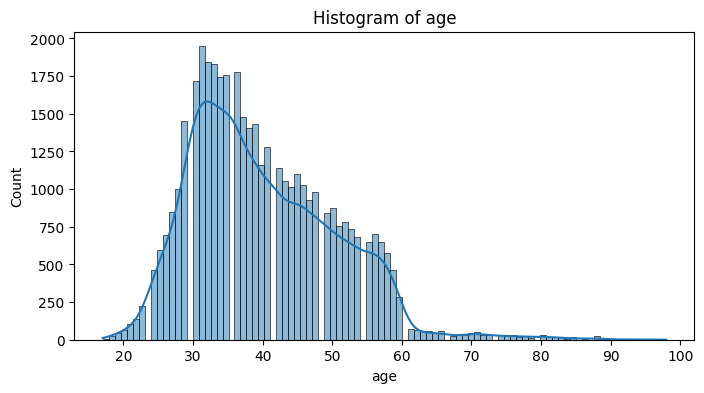

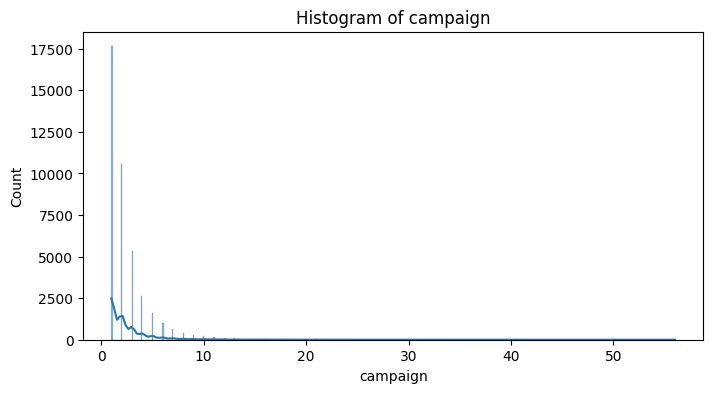

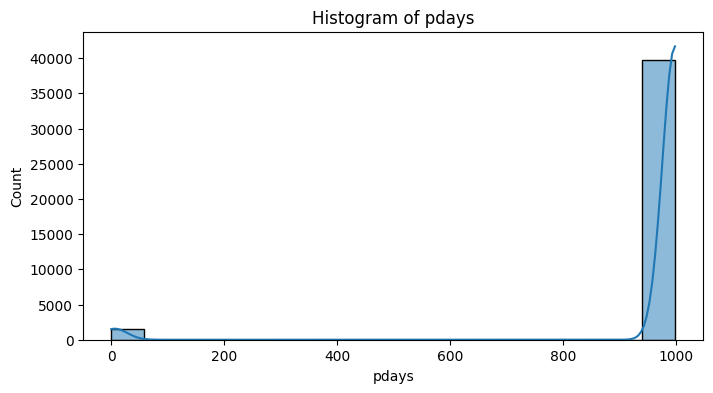

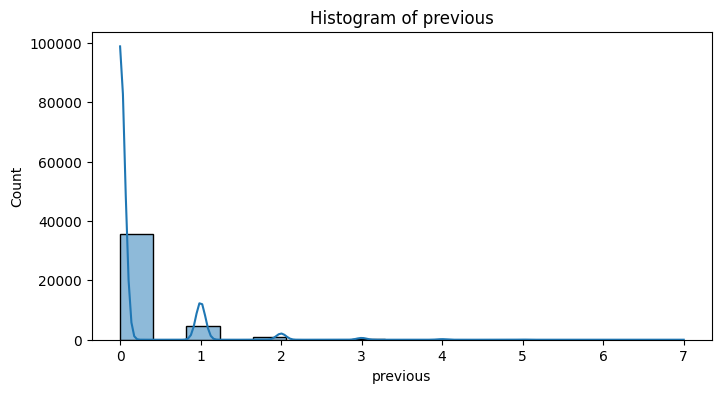

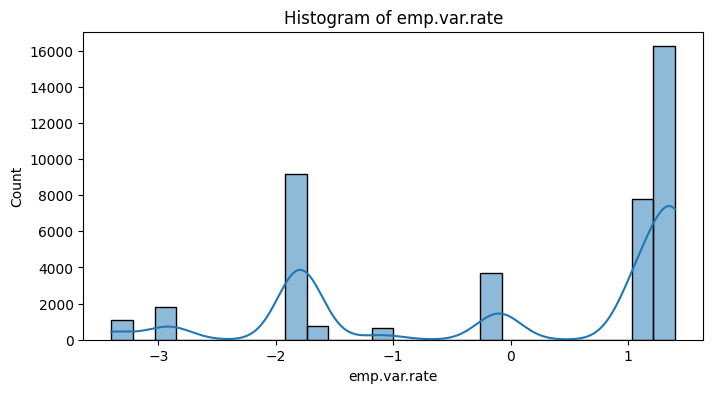

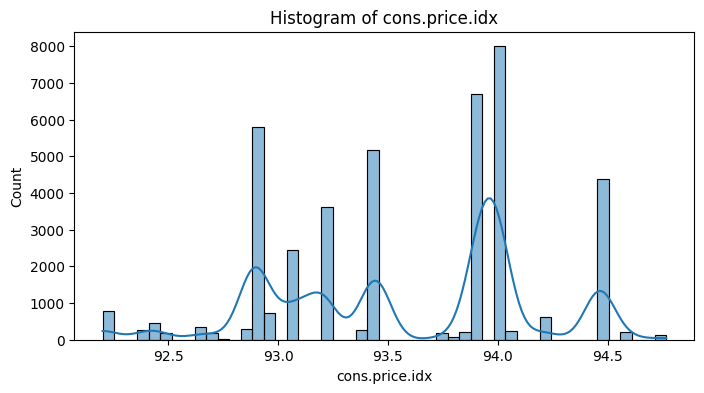

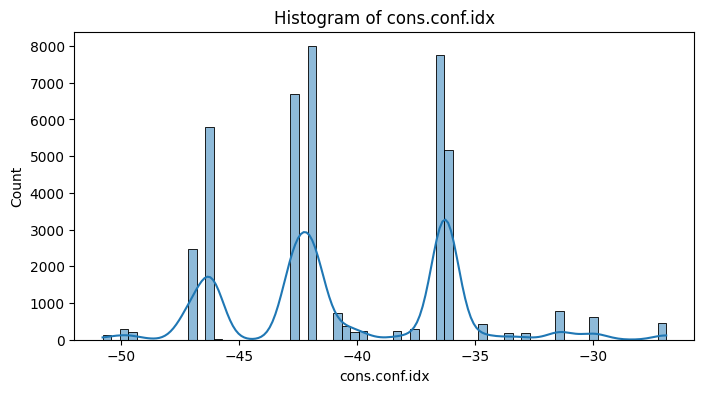

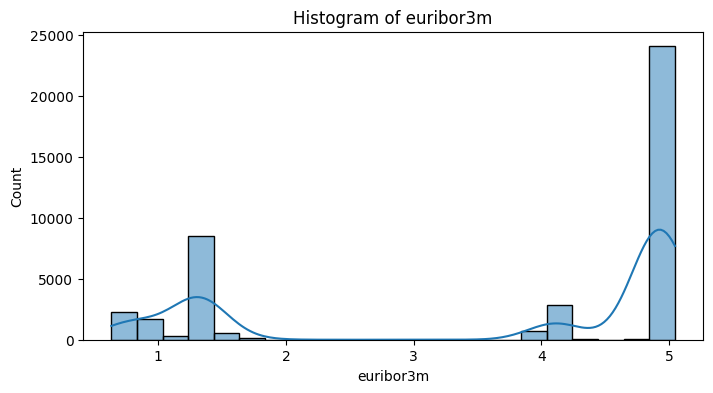

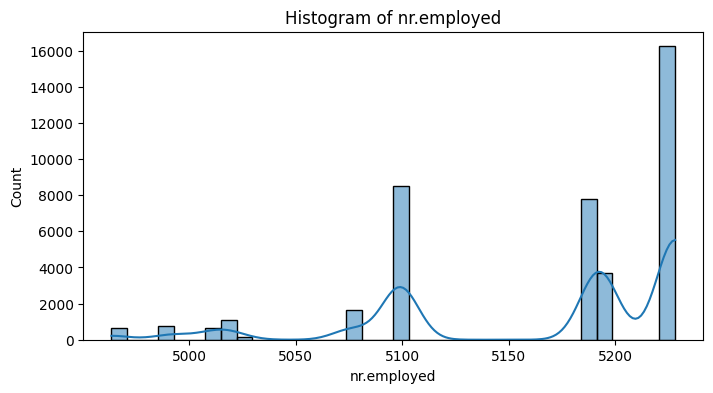

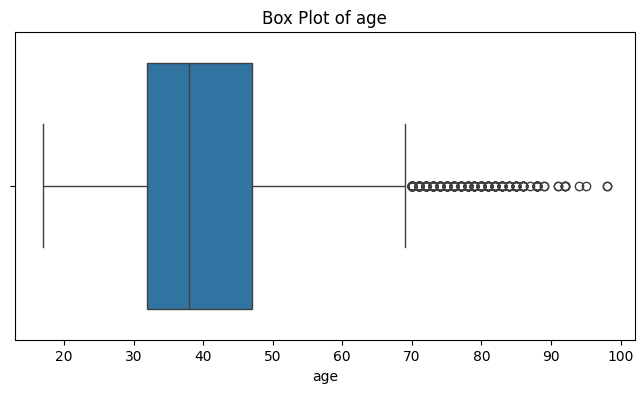

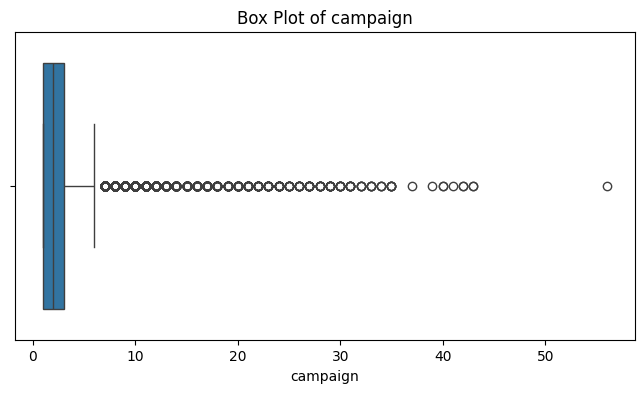

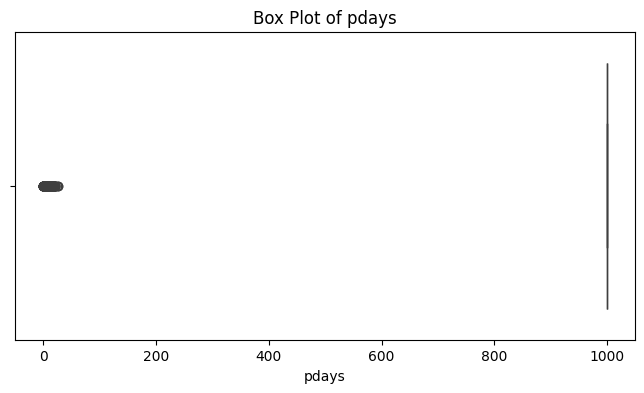

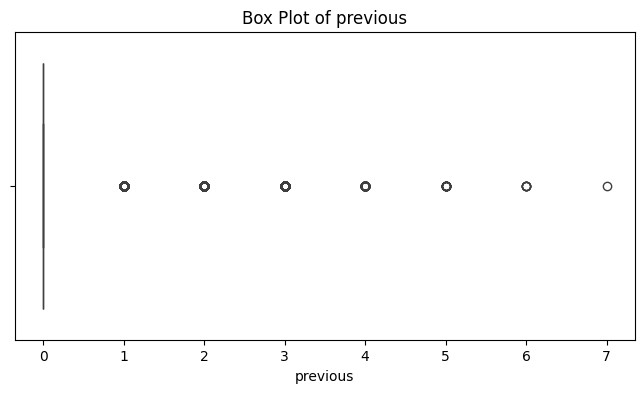

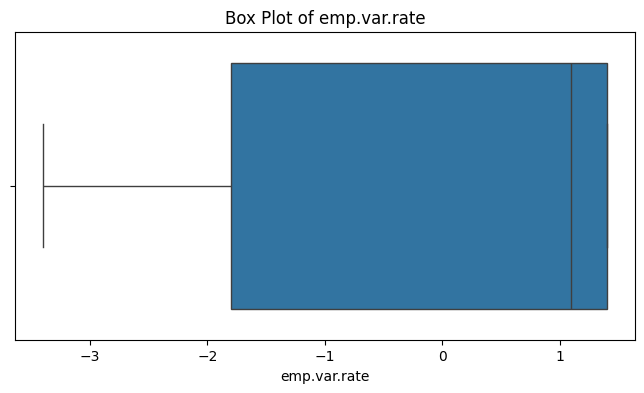

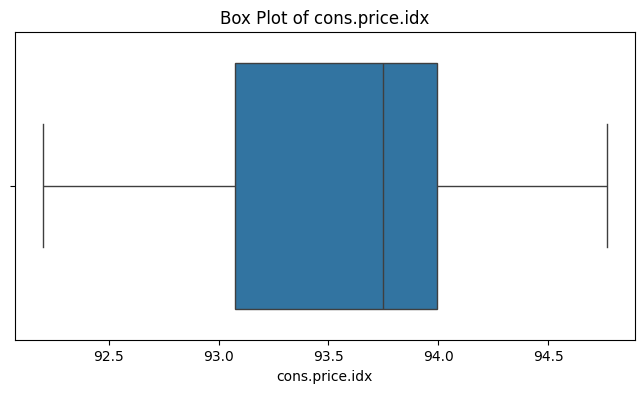

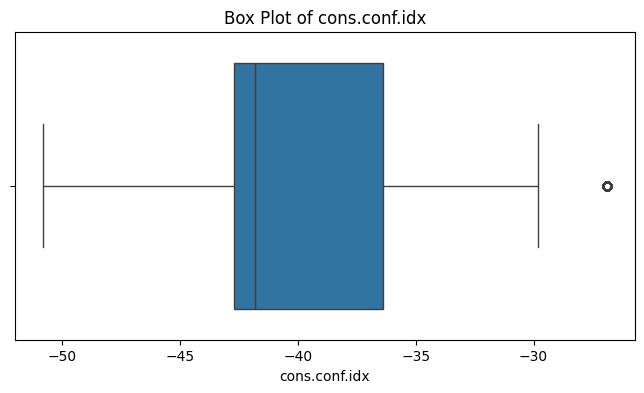

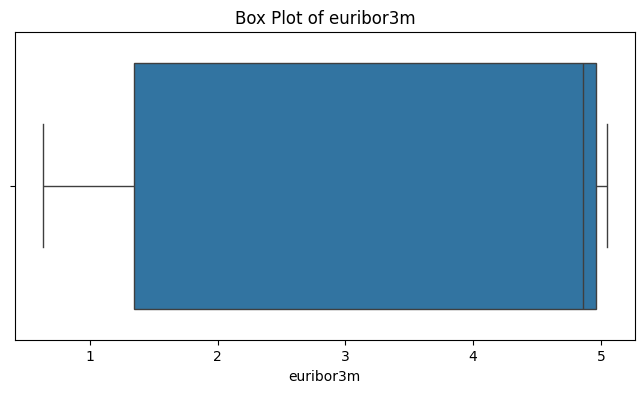

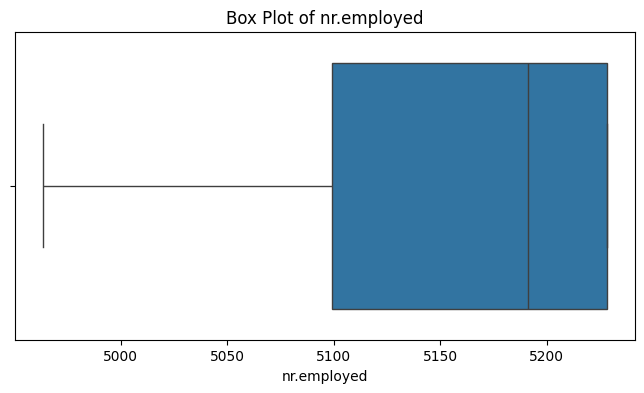

               age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50

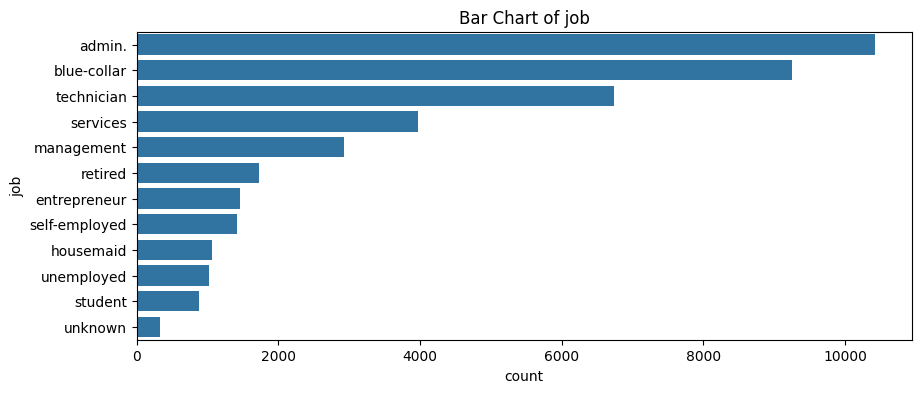

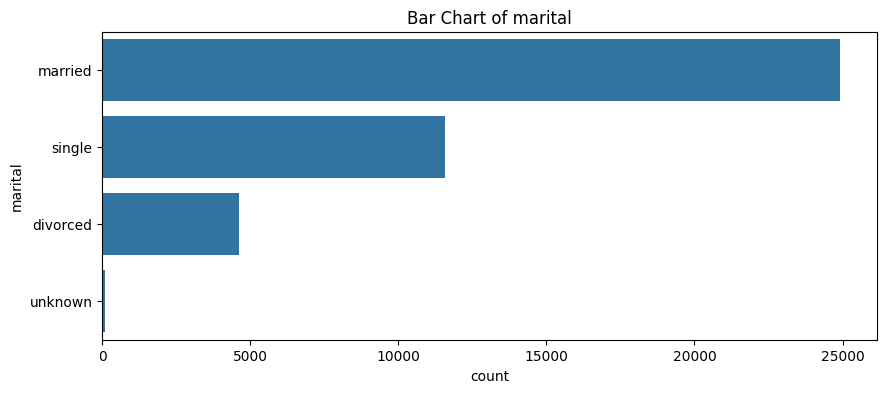

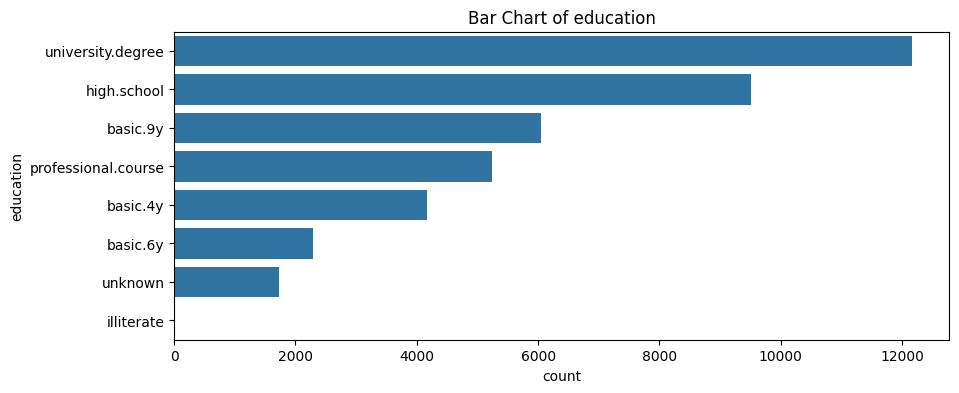

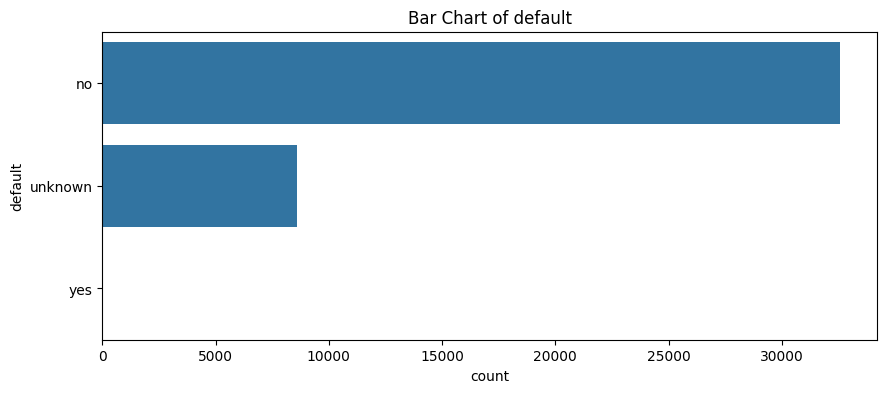

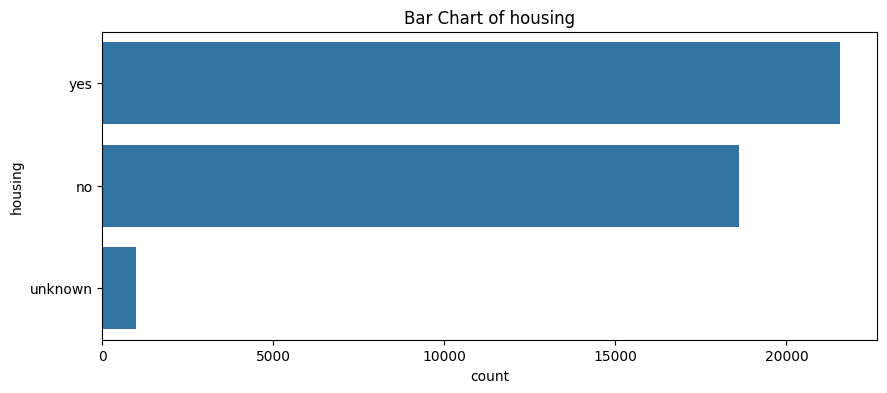

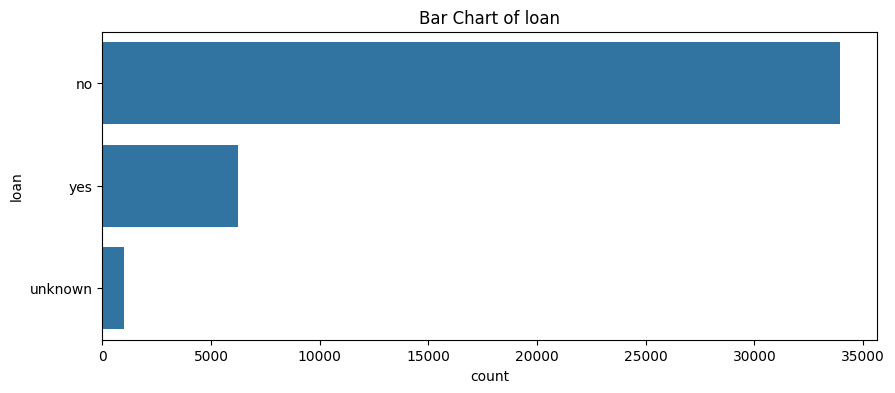

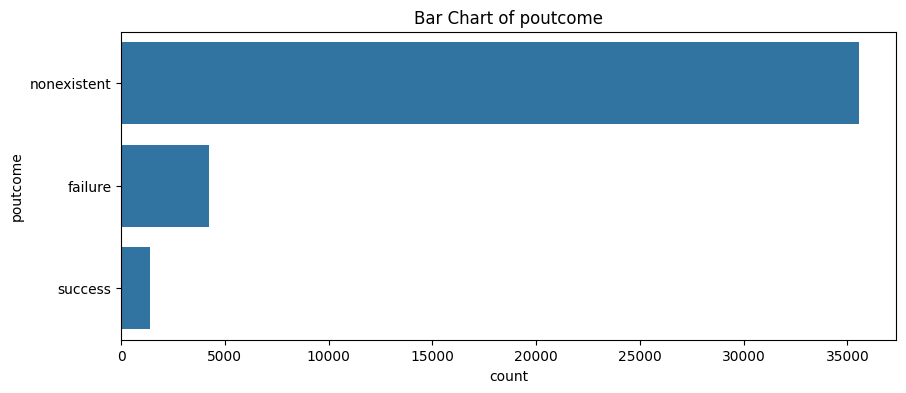

Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Value counts for default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Value counts for housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Value counts for 

In [18]:
#Univariate Analysis

"""
For Numerical Data:
Histograms: To visualize the distribution of each numerical variable.
Box Plots: To identify outliers and the spread of the data.
Summary Statistics: To get a numerical understanding of the data's central tendency and spread.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = [col for col in total_data.columns if total_data[col].dtype != 'object']

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(total_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=total_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Summary Statistics (done again to relook at the info)
print(total_data[numerical_cols].describe())

"""
For Categorical Data:
Bar Charts: To understand the frequency distribution of each category.
Value Counts: To get the count of each category in each variable.
"""

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Bar Charts
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=total_data[col], order = total_data[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.show()

# Value Counts
for col in categorical_cols:
    print(f'Value counts for {col}:\n{total_data[col].value_counts()}\n')



Bivariate Analysis:
Numerical-Numerical Relationships:

Use scatter plots to explore relationships between pairs of numerical variables.
Correlation analysis can also be insightful.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots
sns.pairplot(total_data[numerical_cols])
plt.show()

# Correlation matrix
correlation_matrix = total_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Categorical-Numerical Relationships:

Box plots or violin plots can be used to understand how the distribution of a numerical variable varies with different categories.

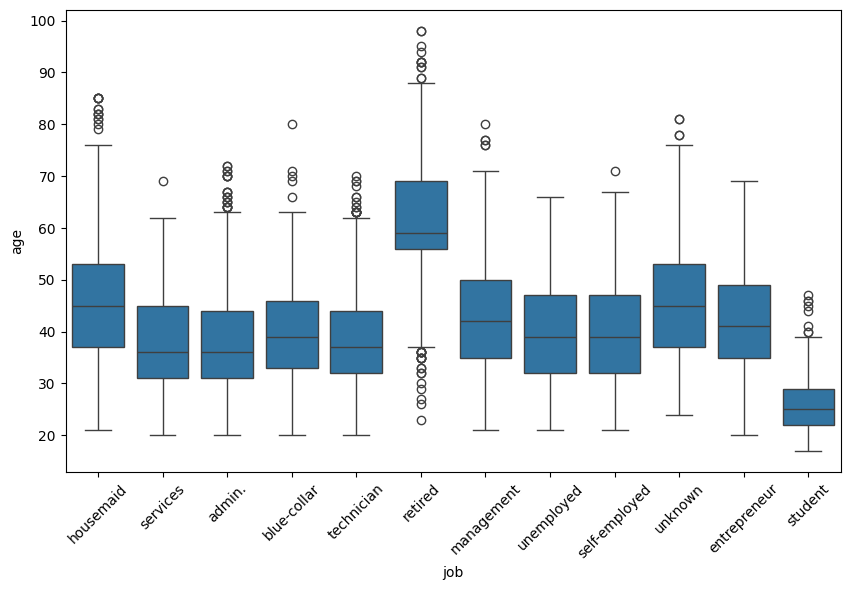

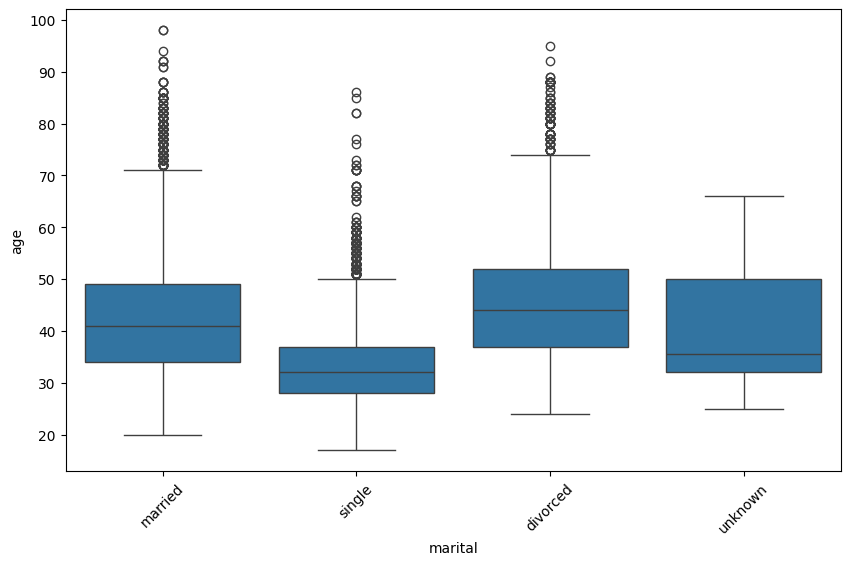

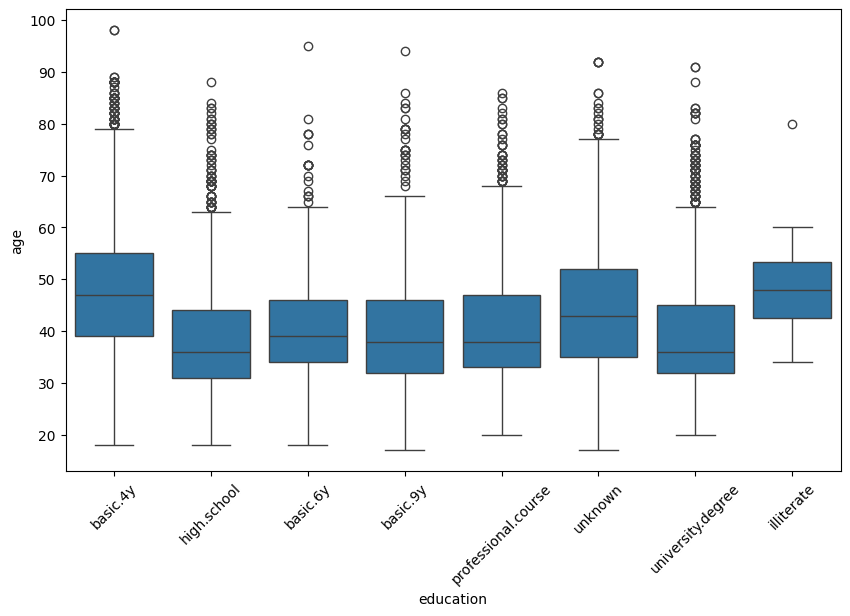

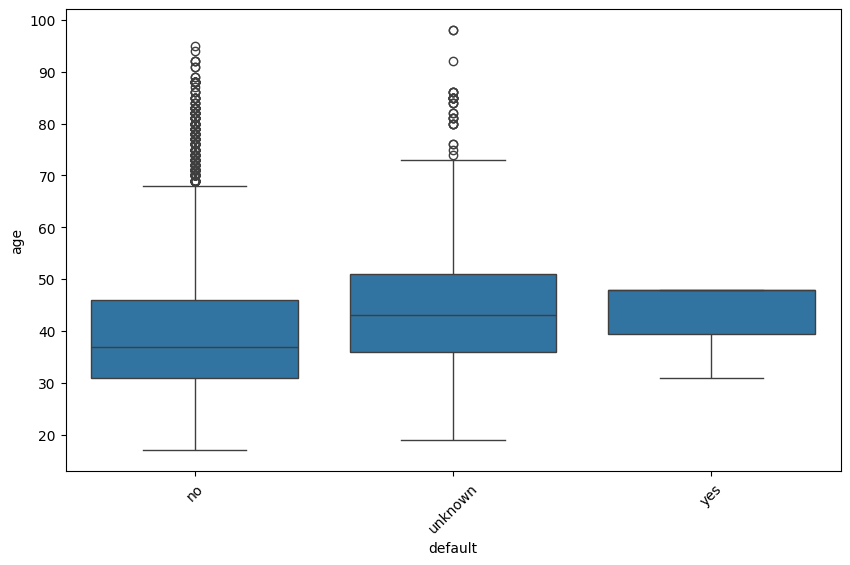

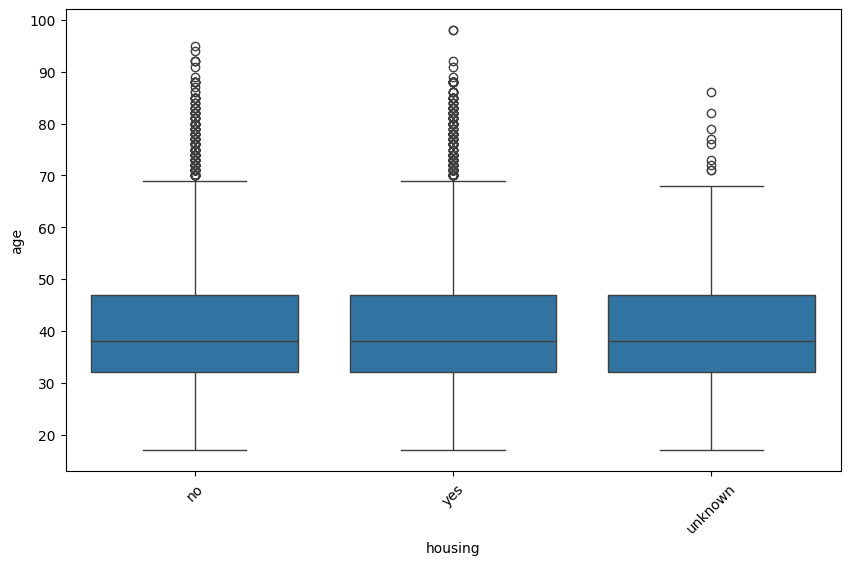

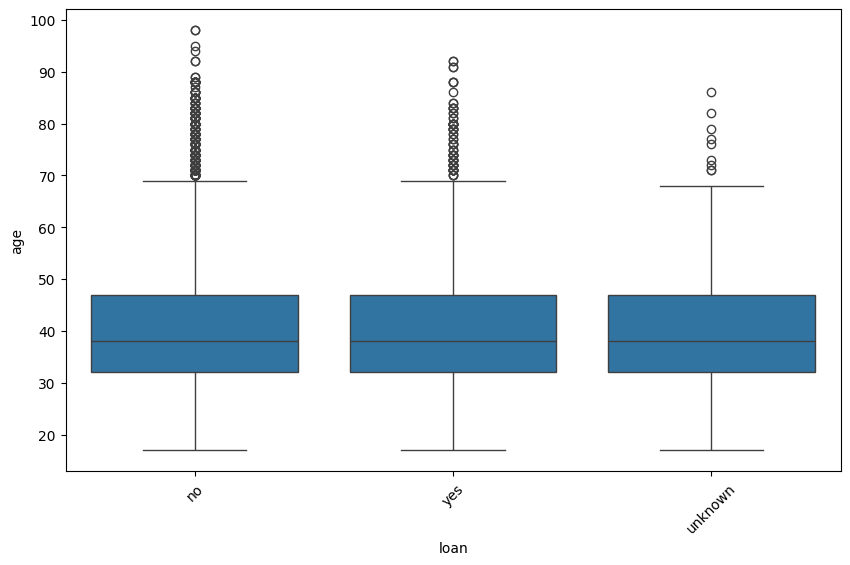

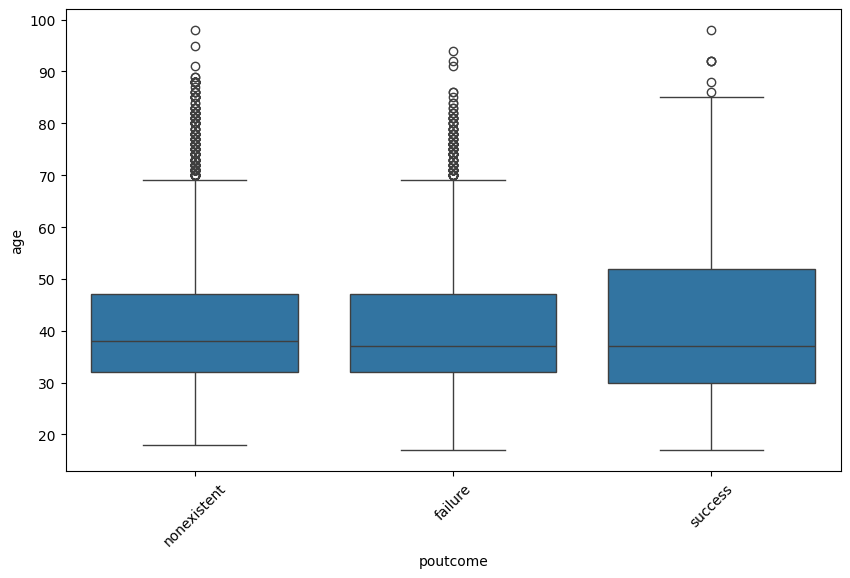

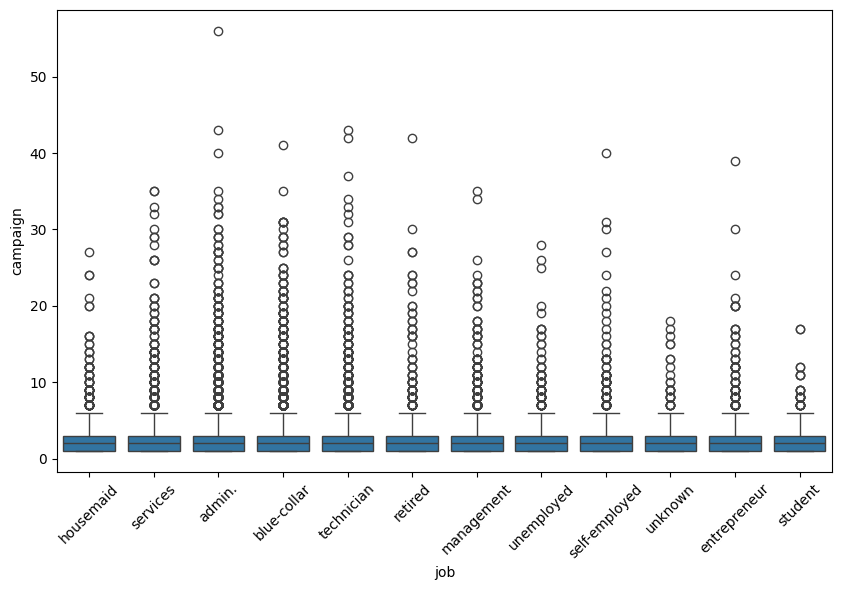

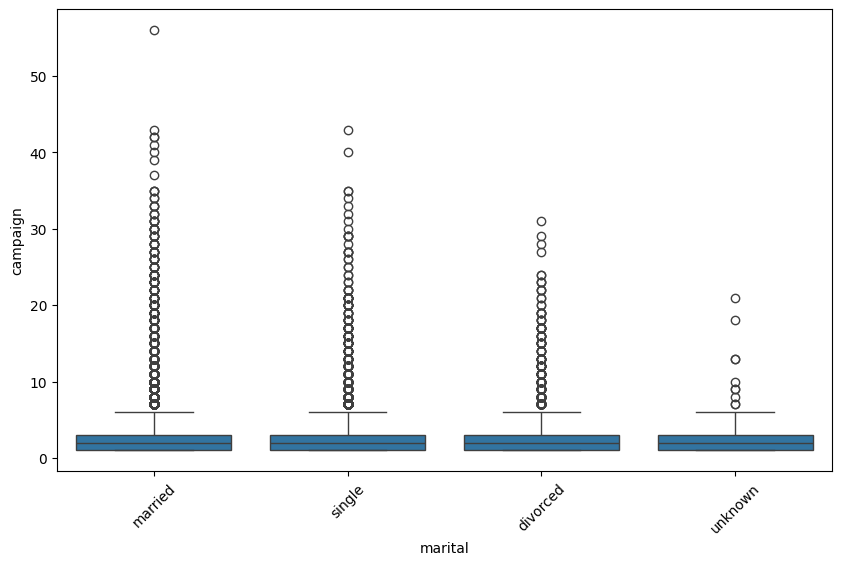

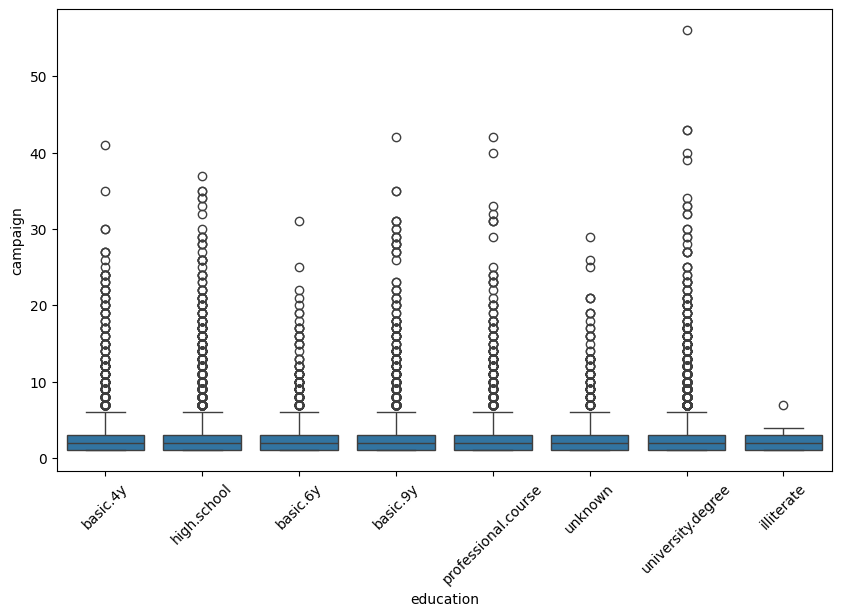

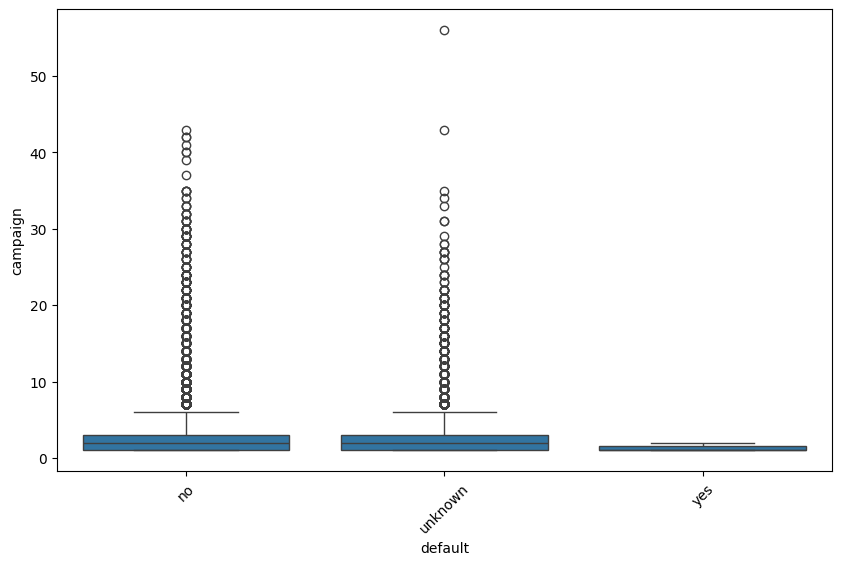

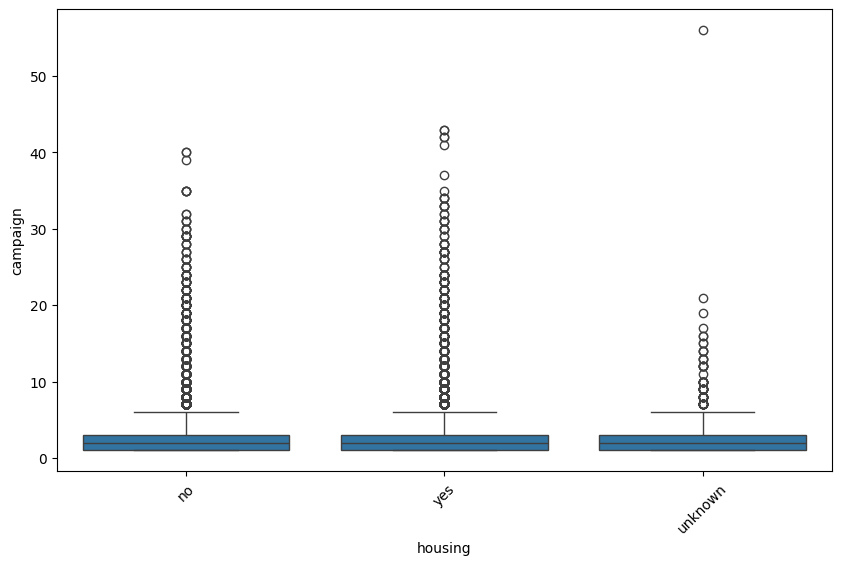

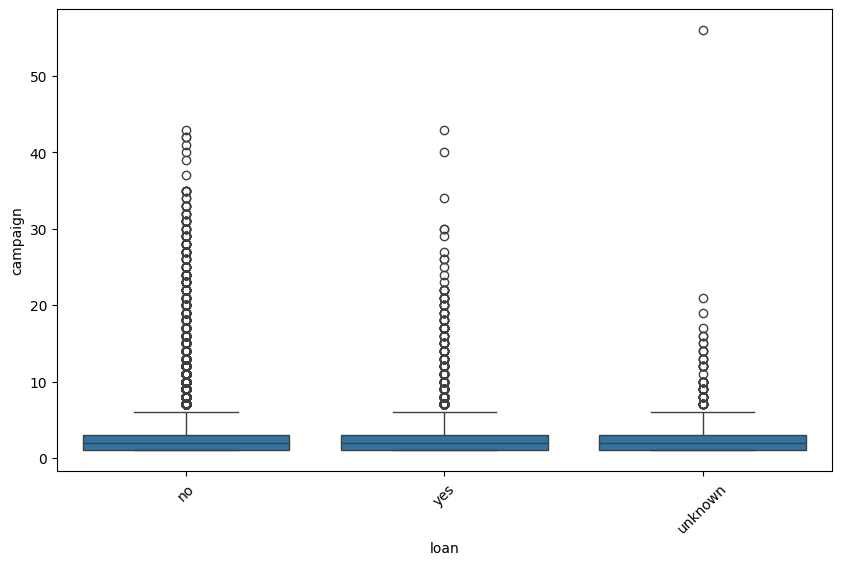

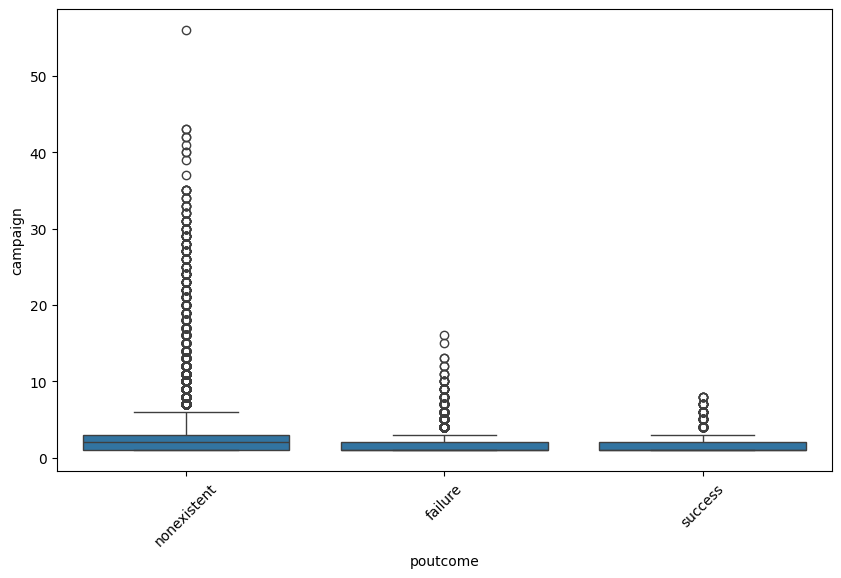

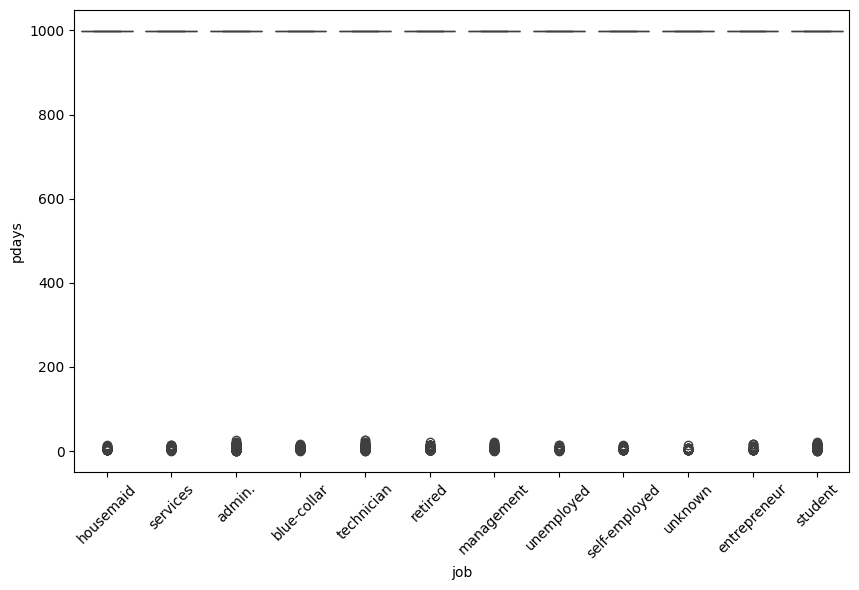

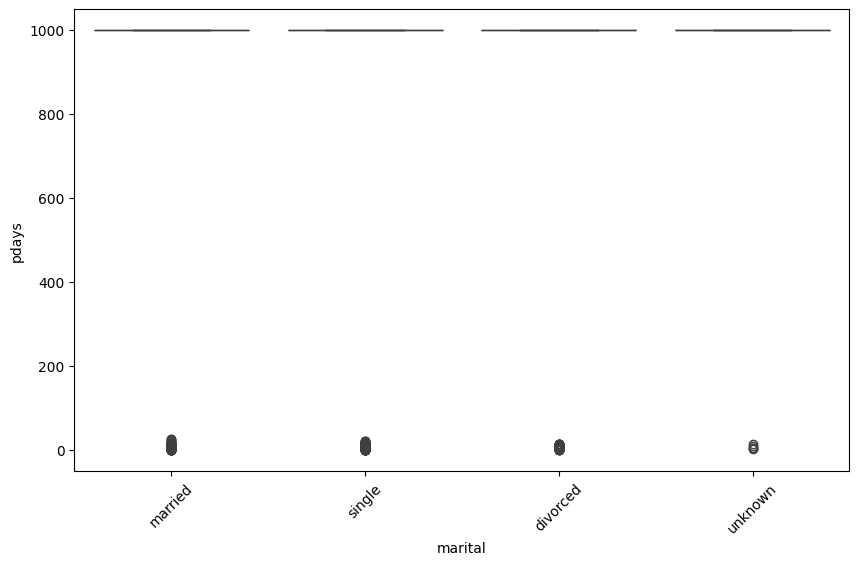

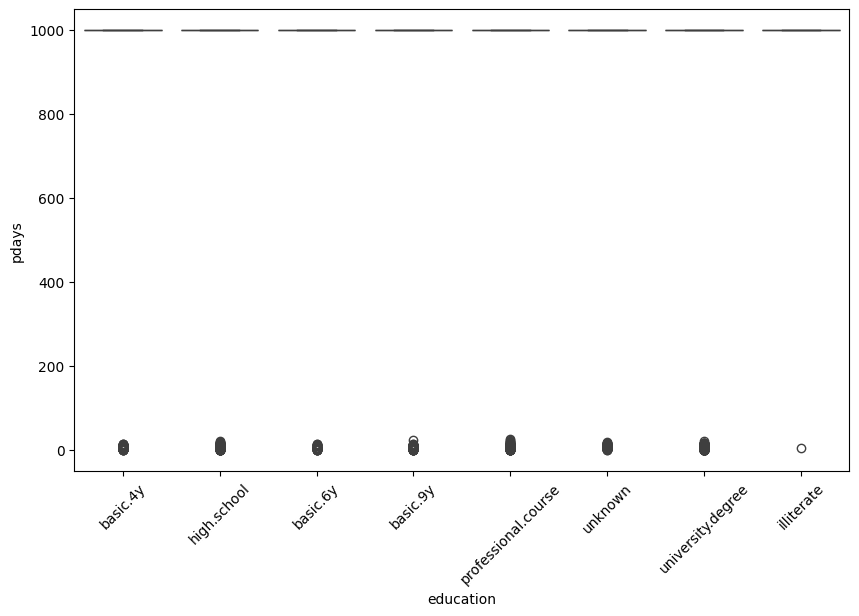

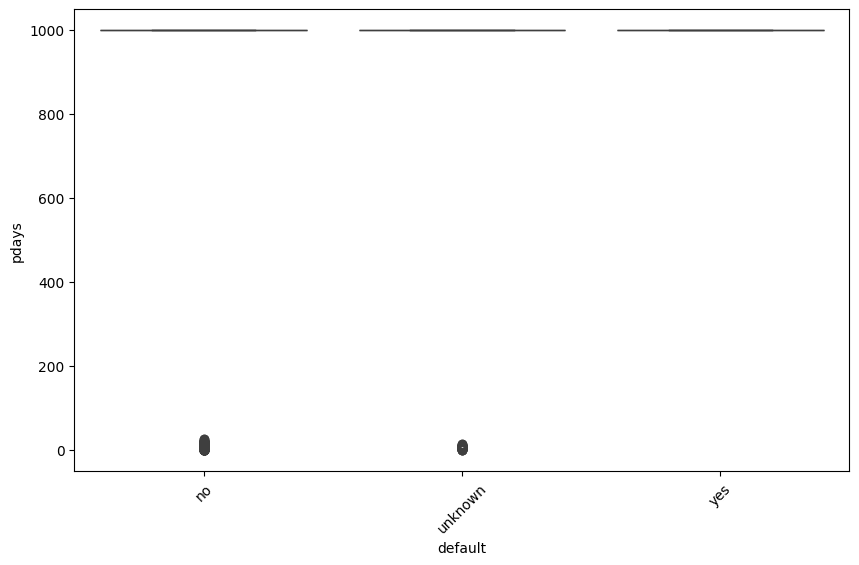

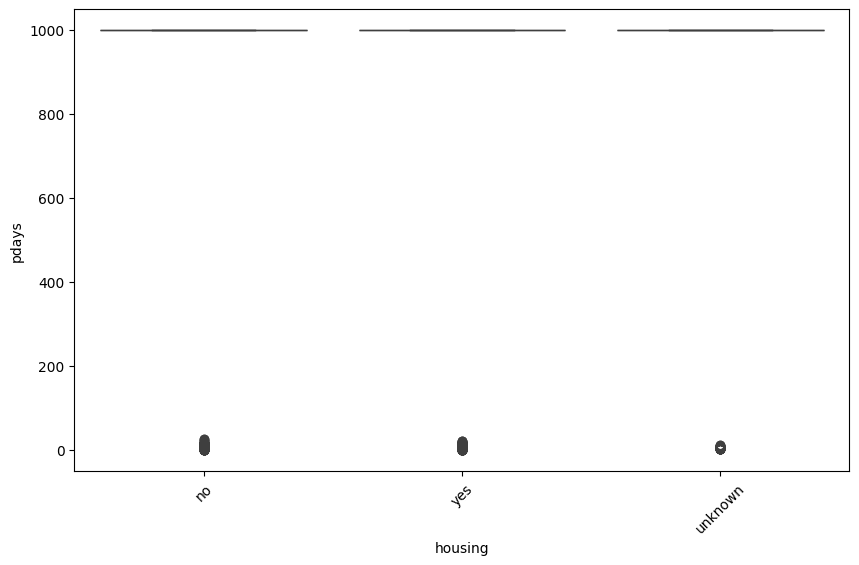

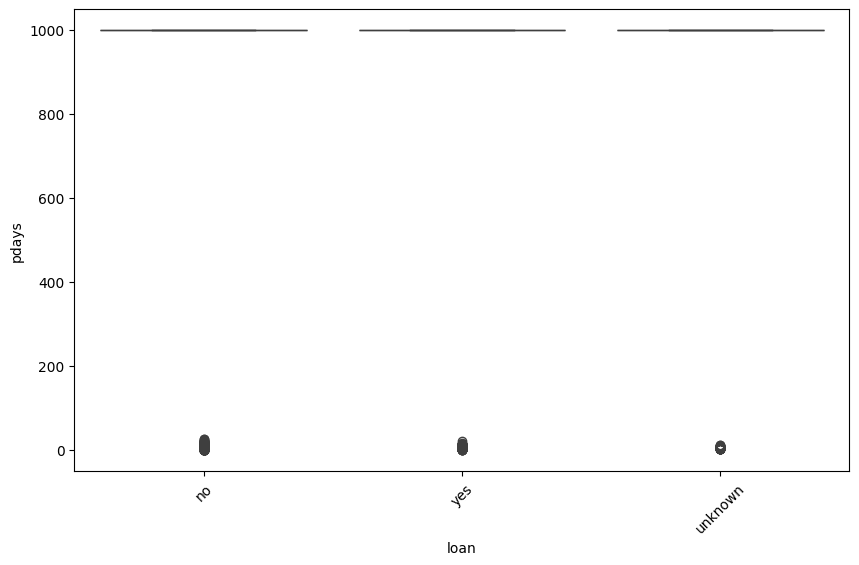

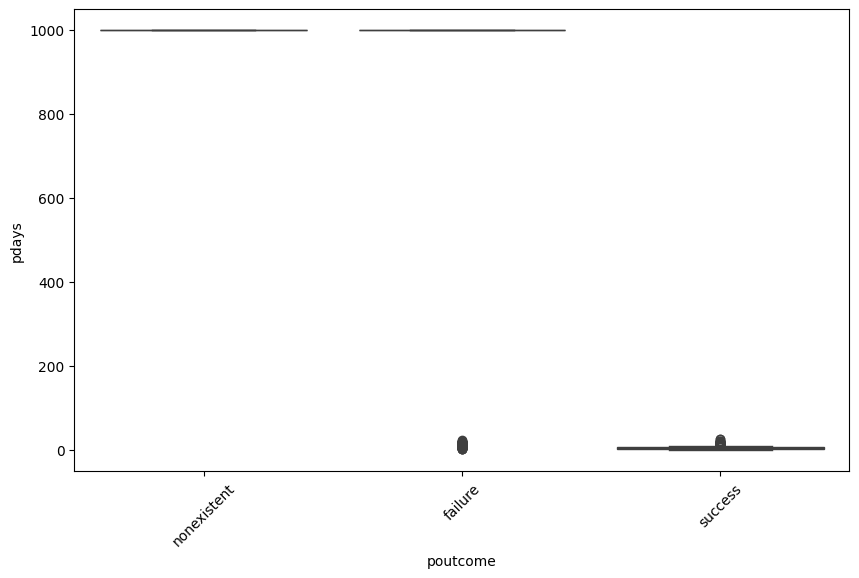

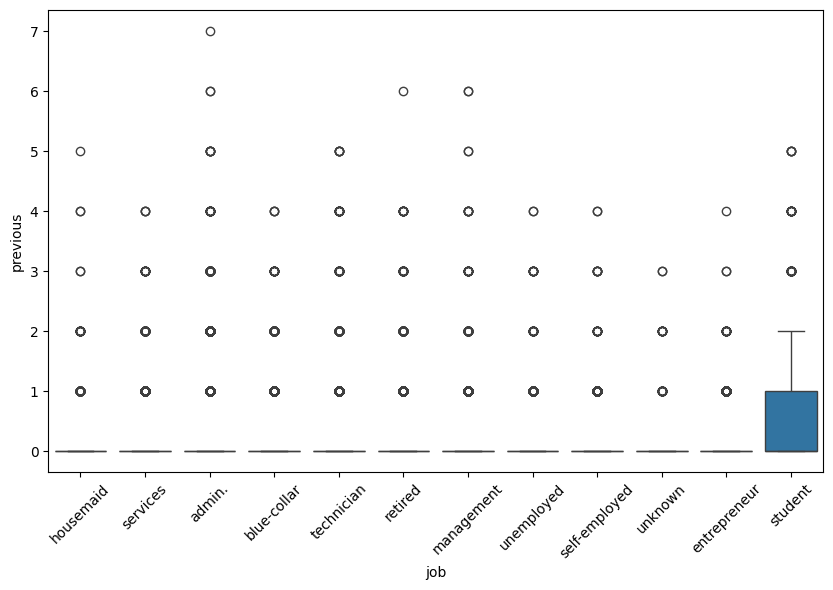

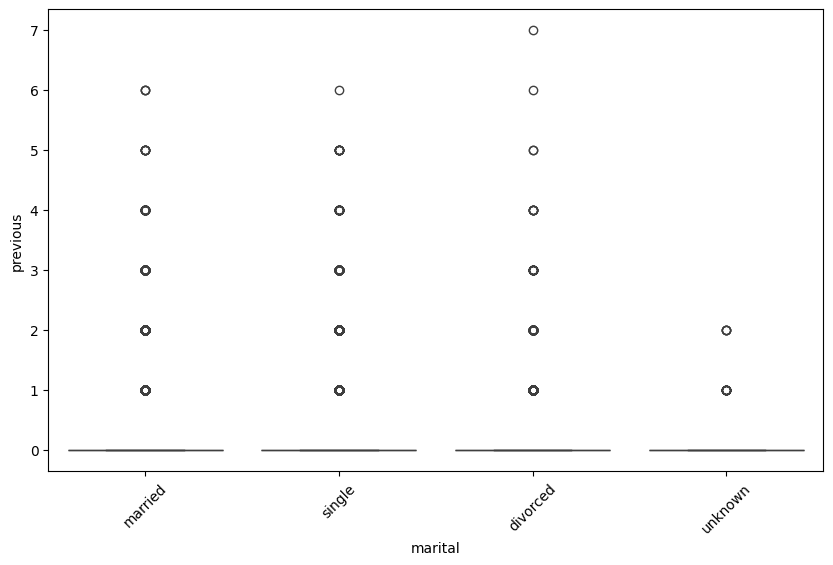

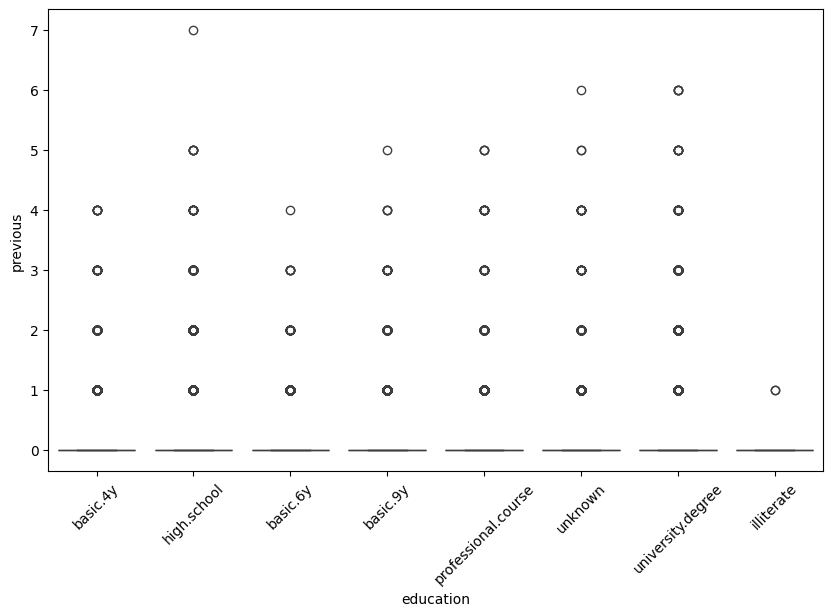

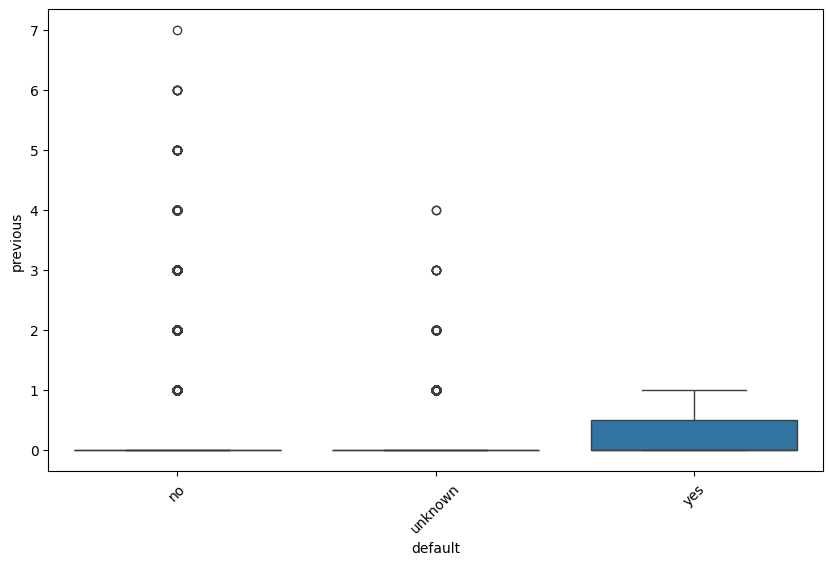

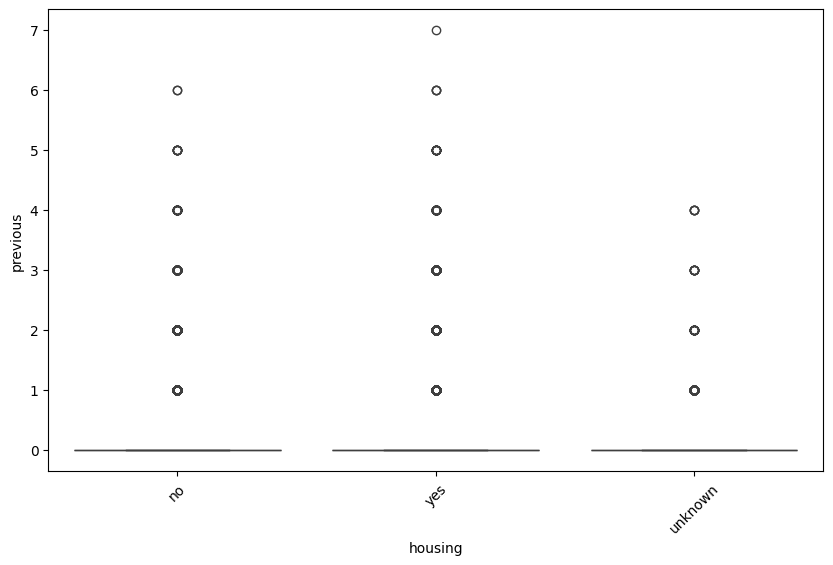

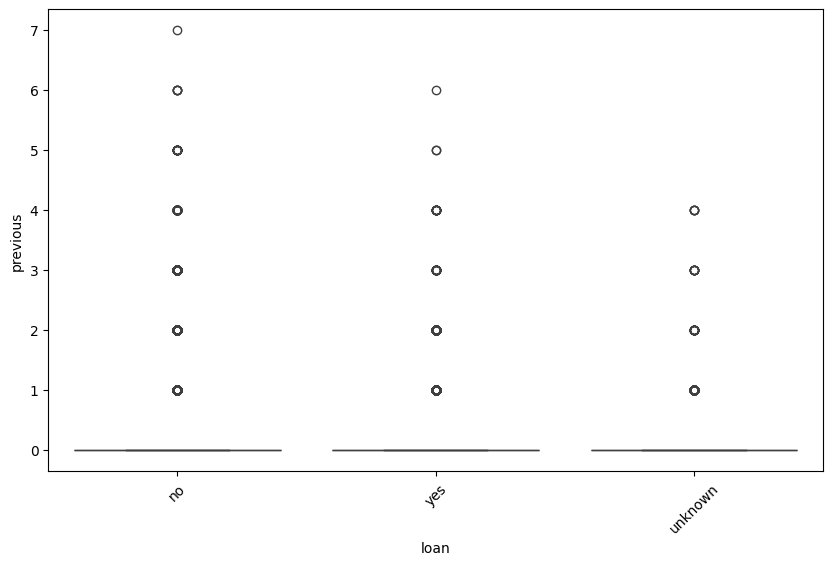

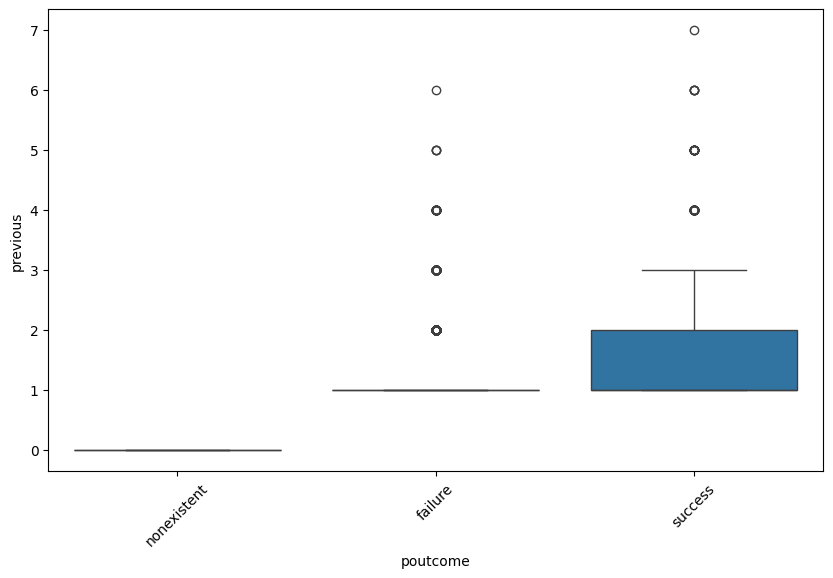

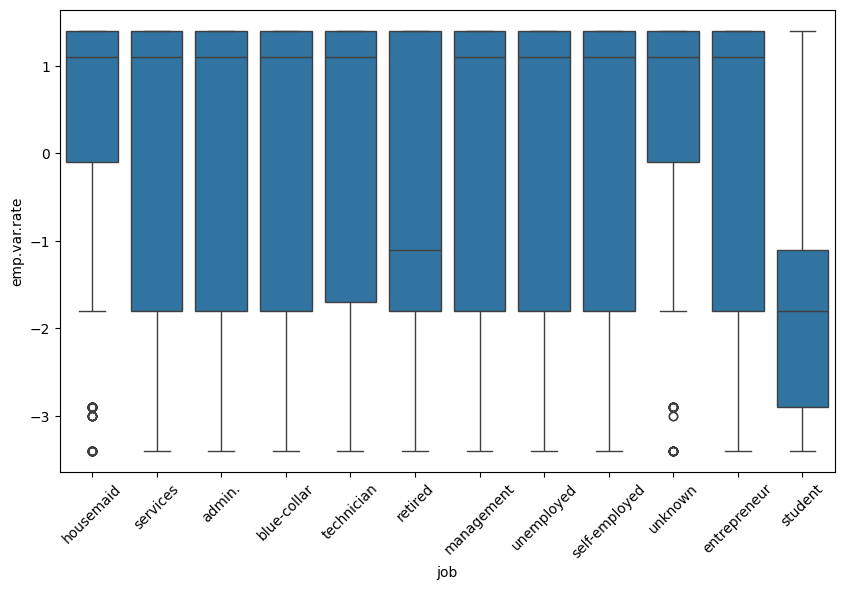

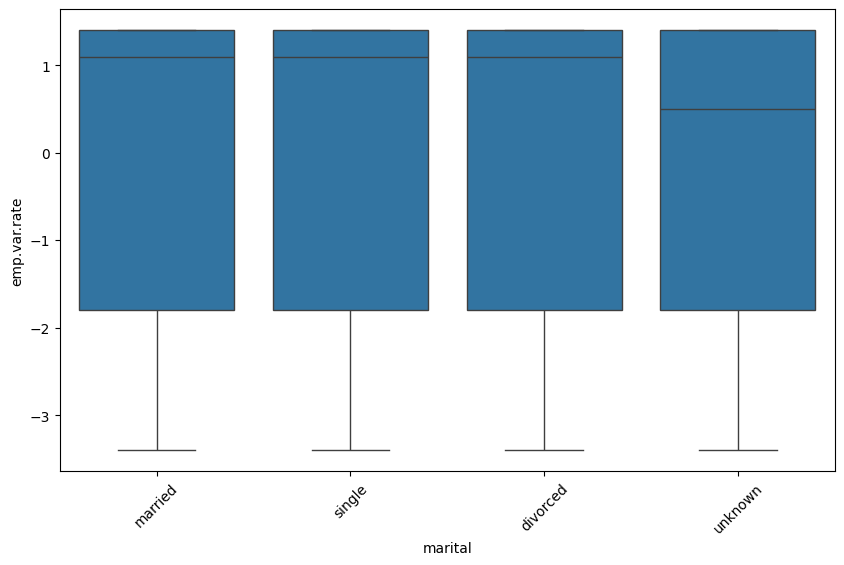

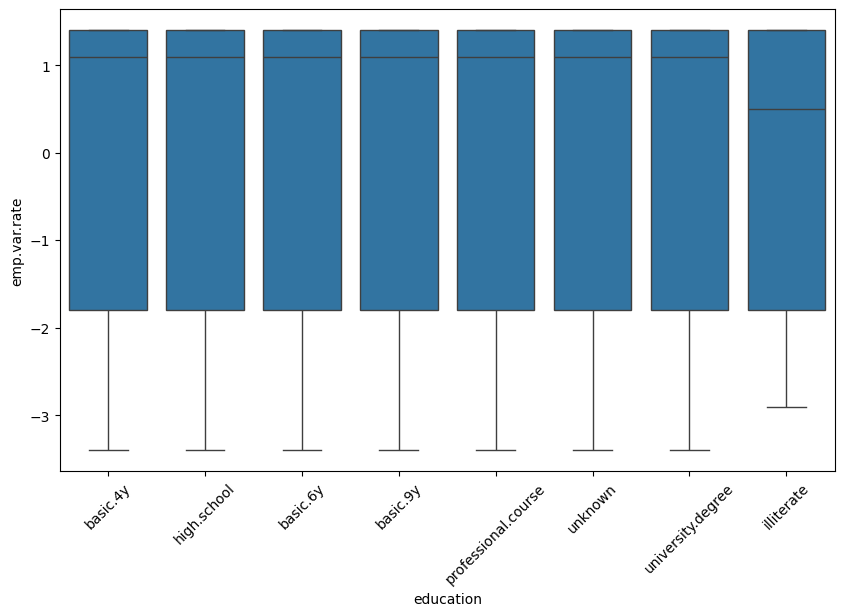

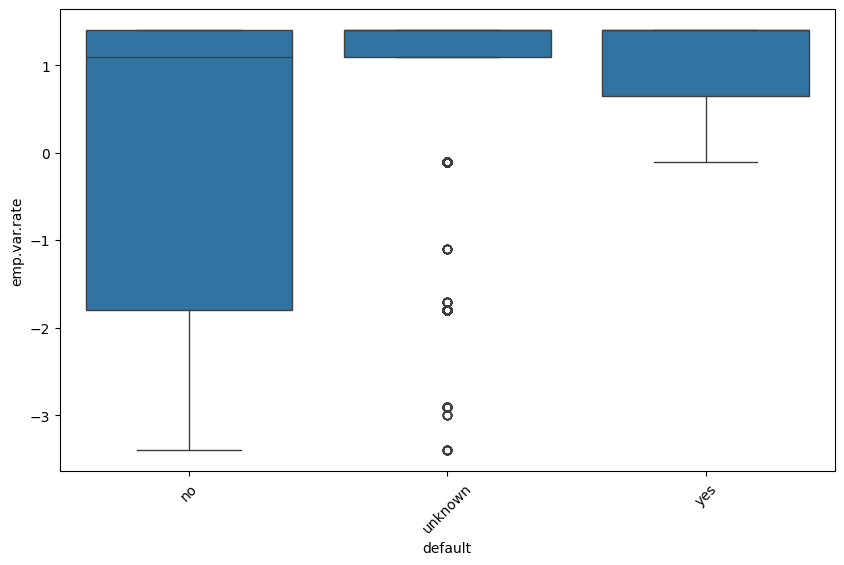

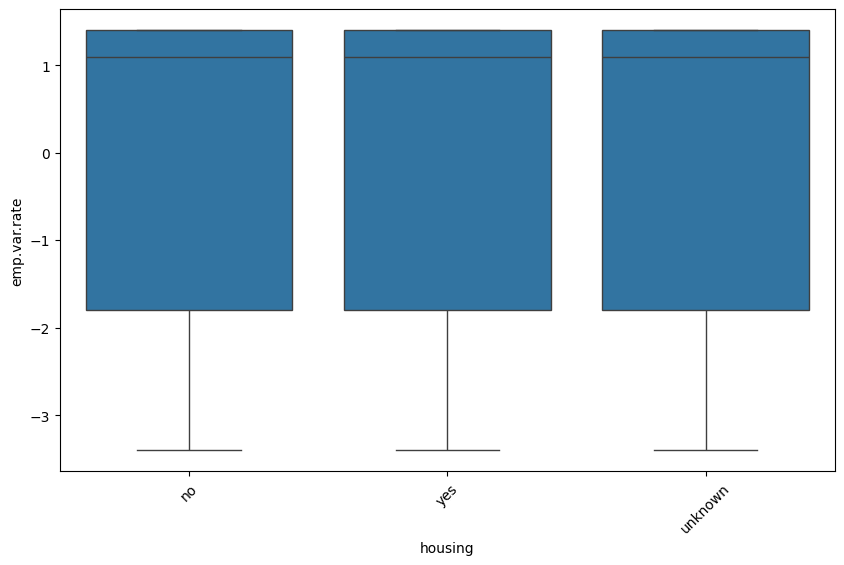

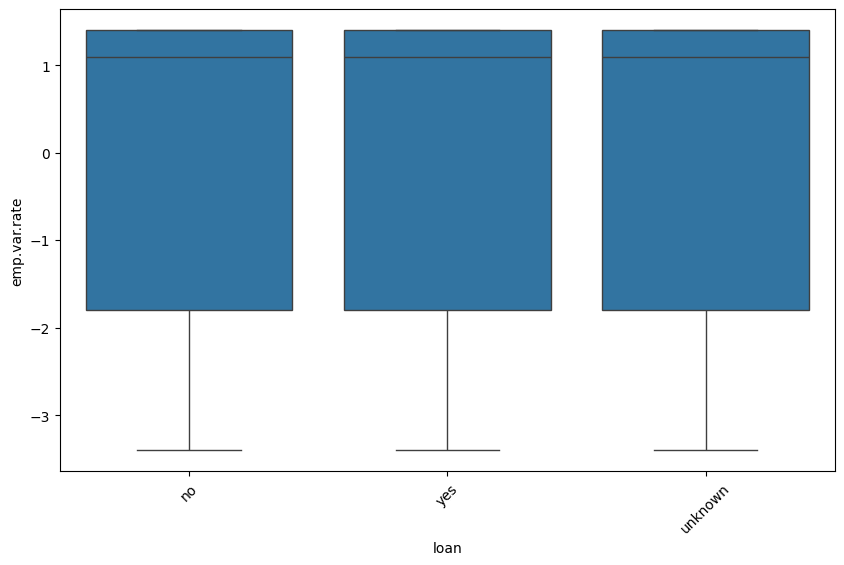

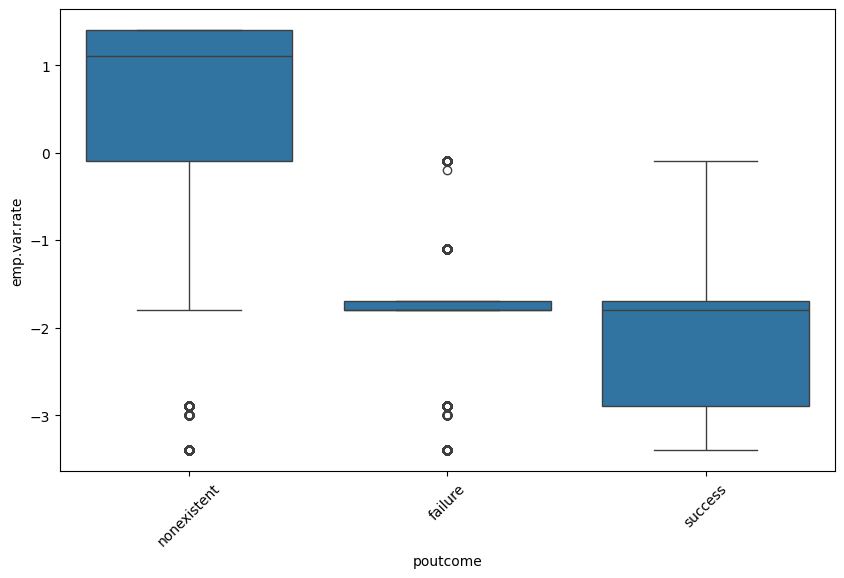

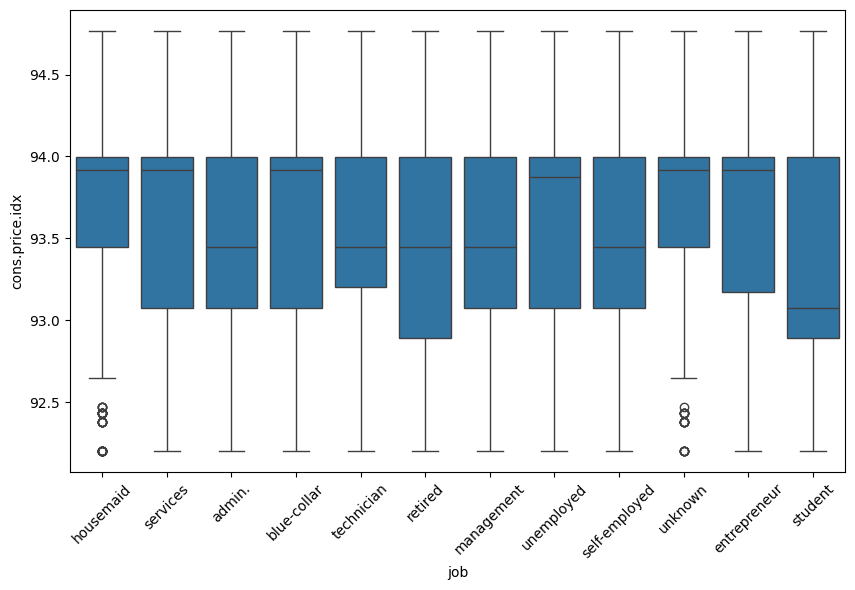

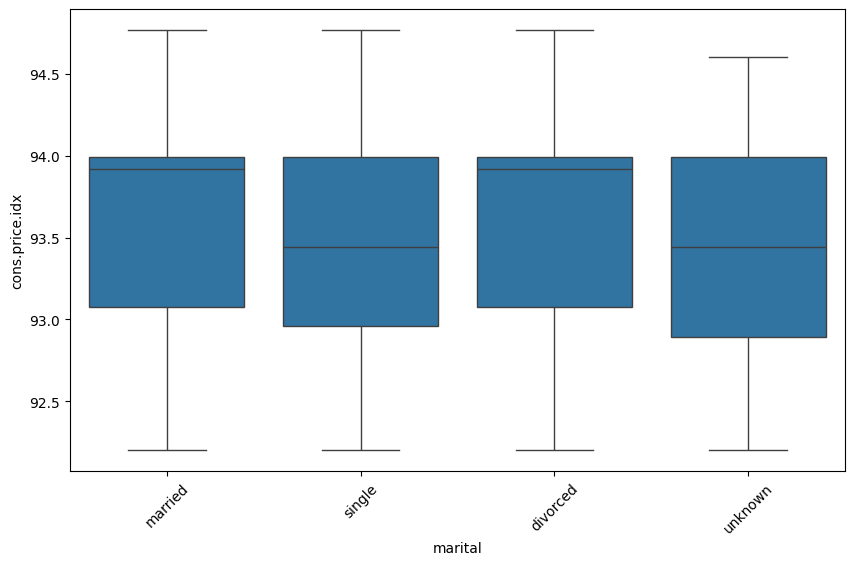

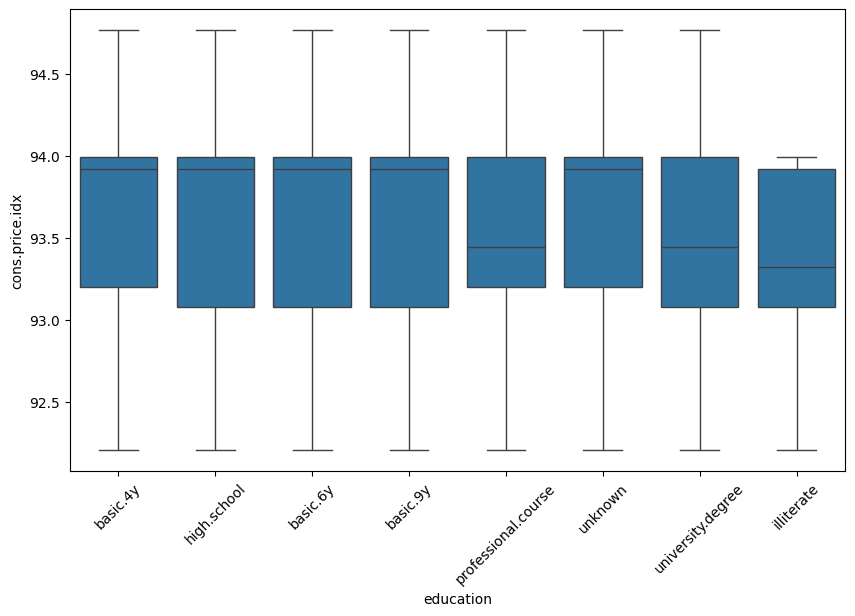

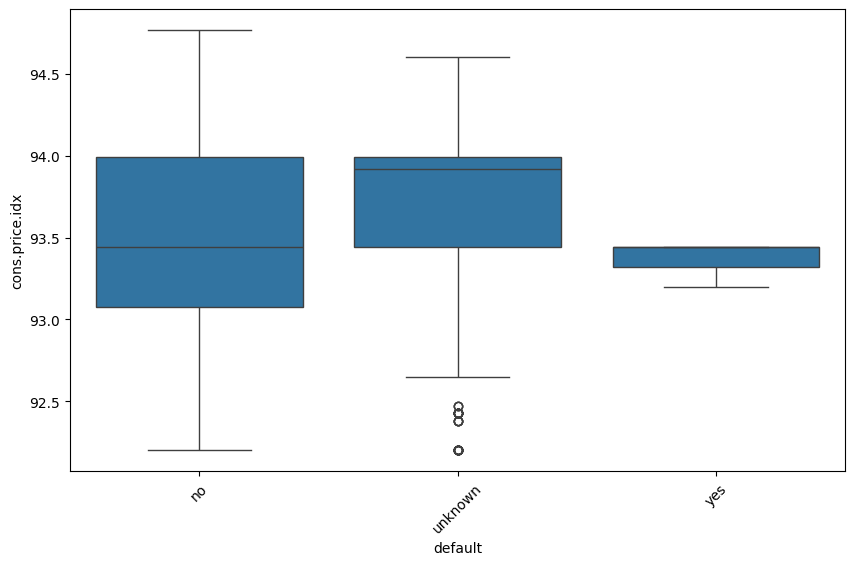

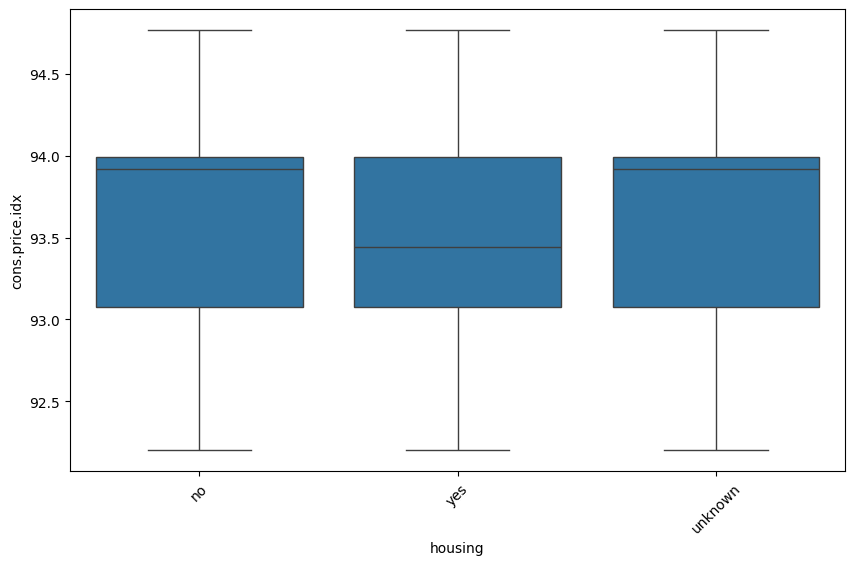

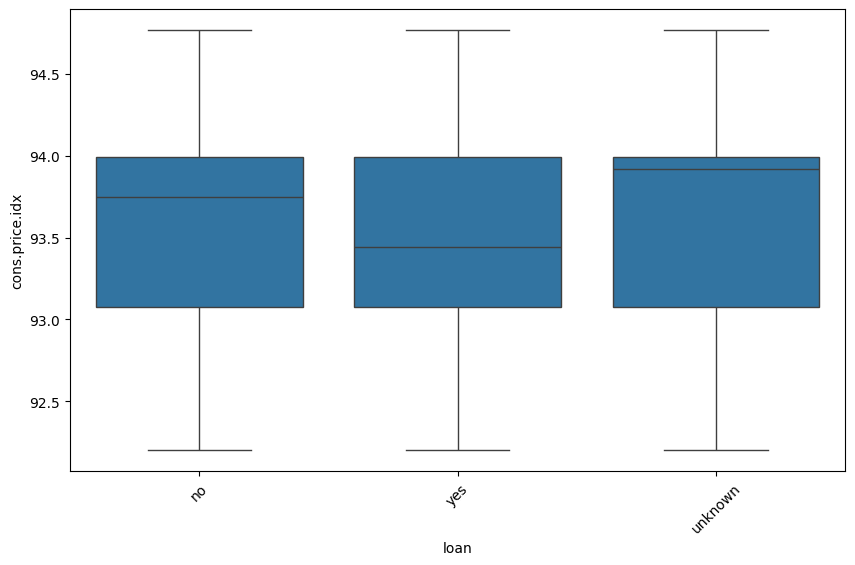

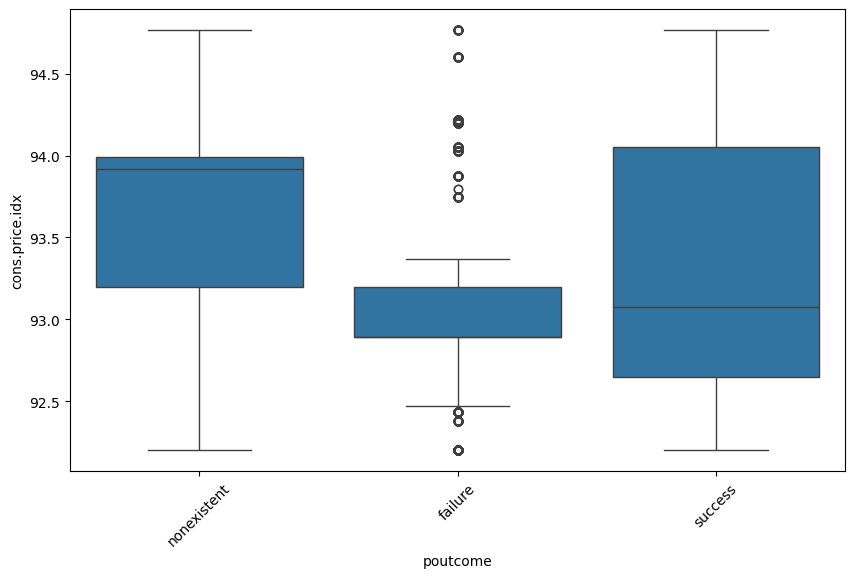

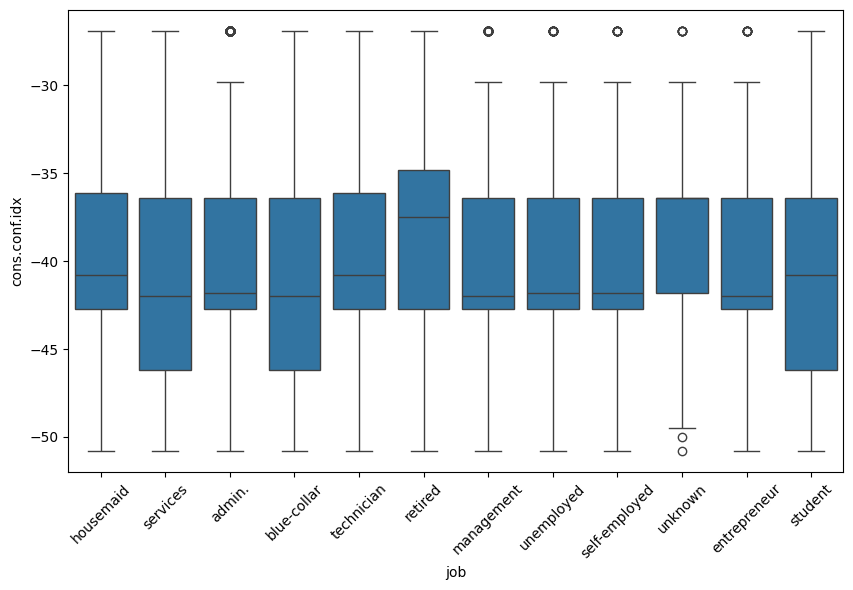

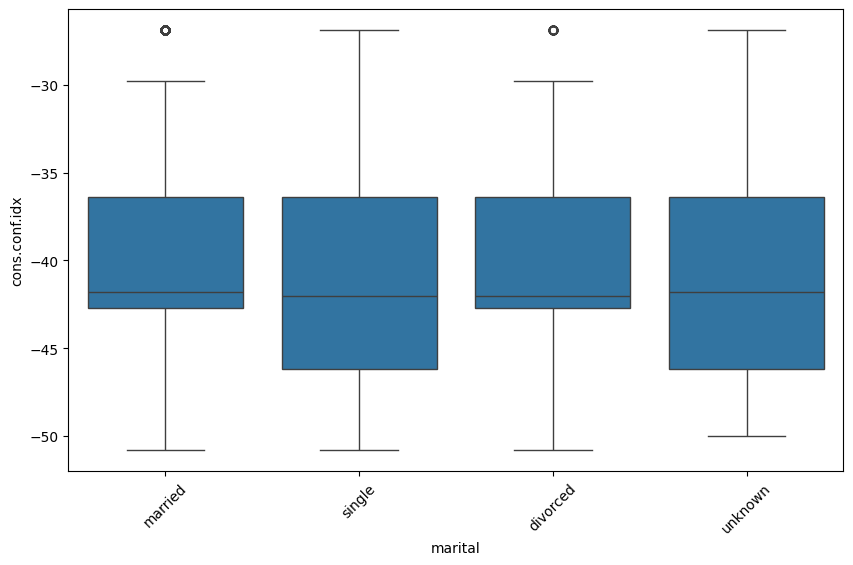

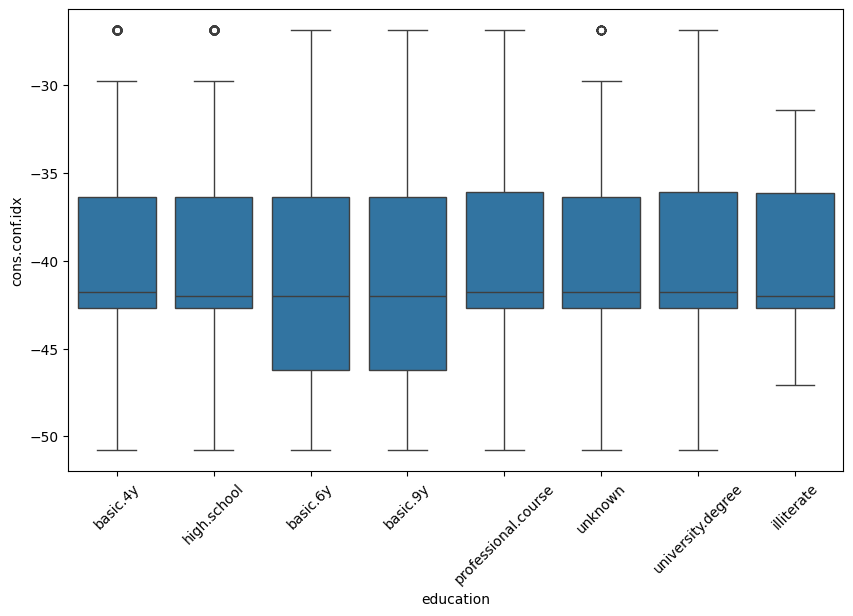

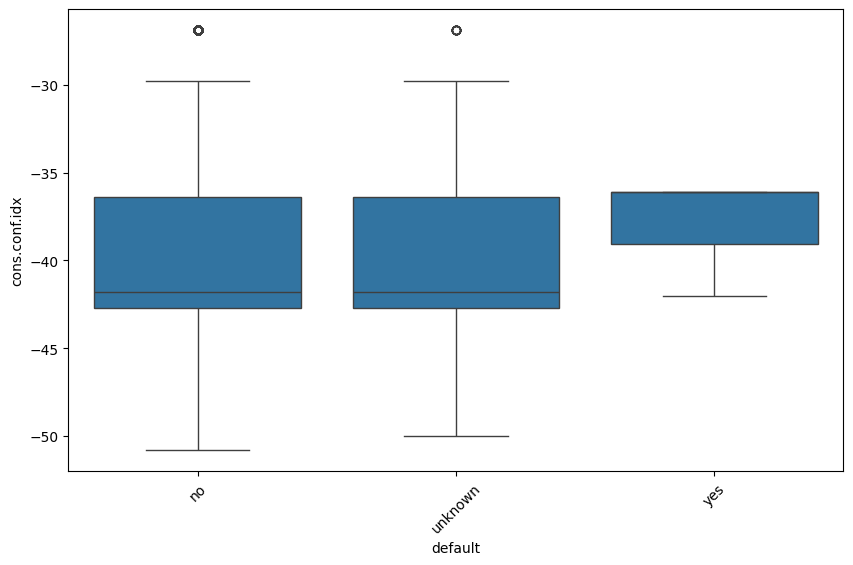

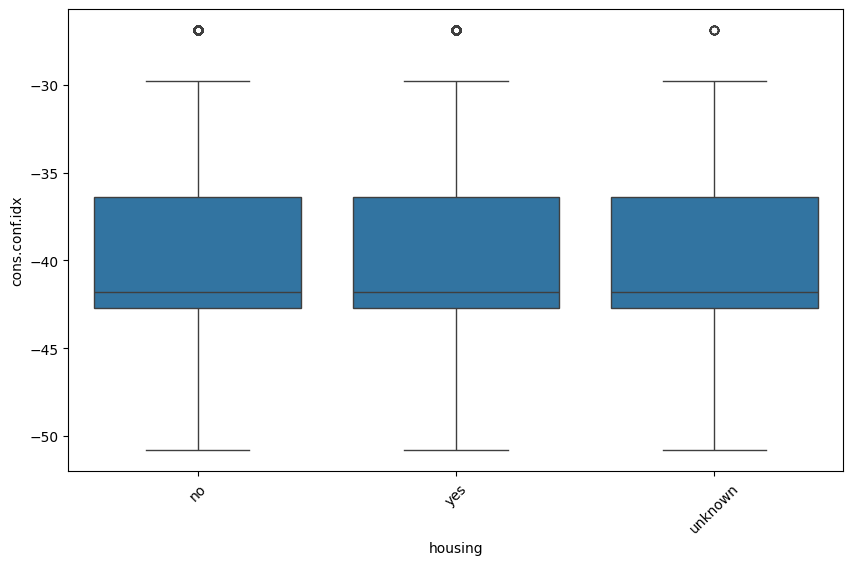

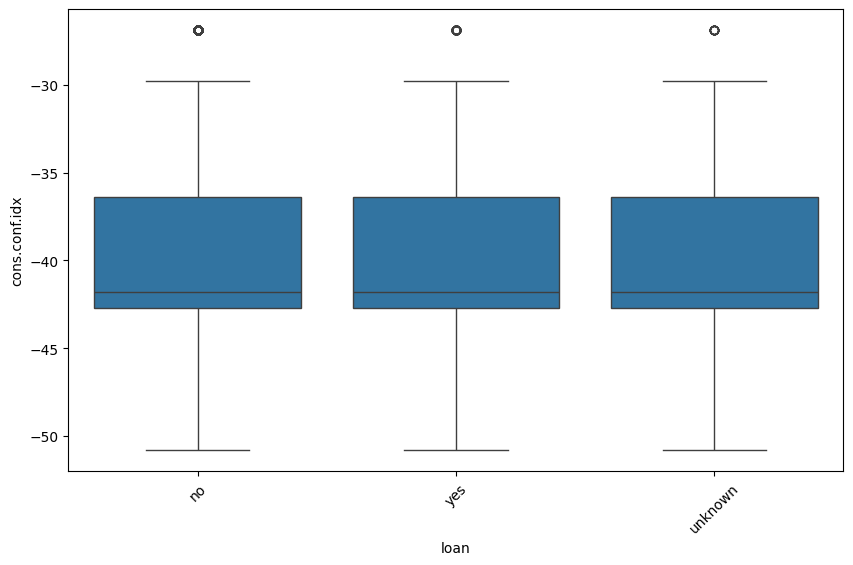

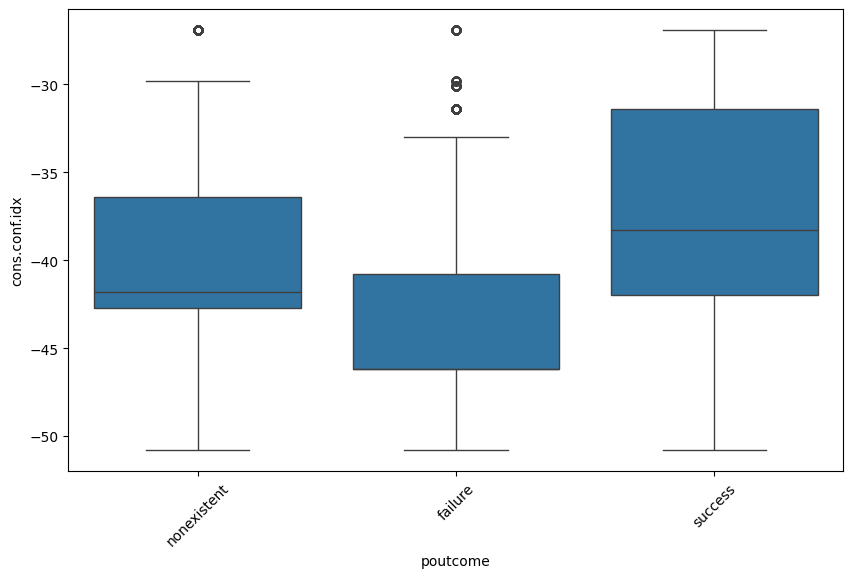

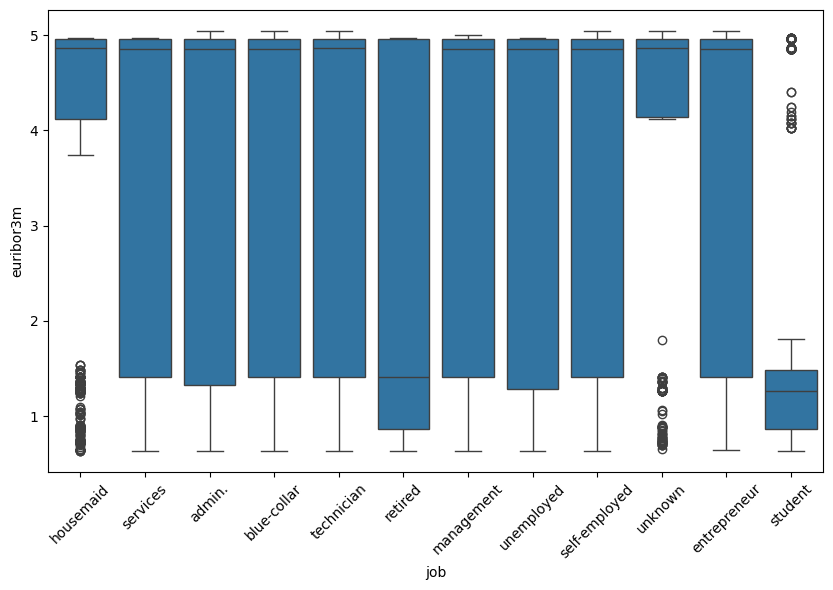

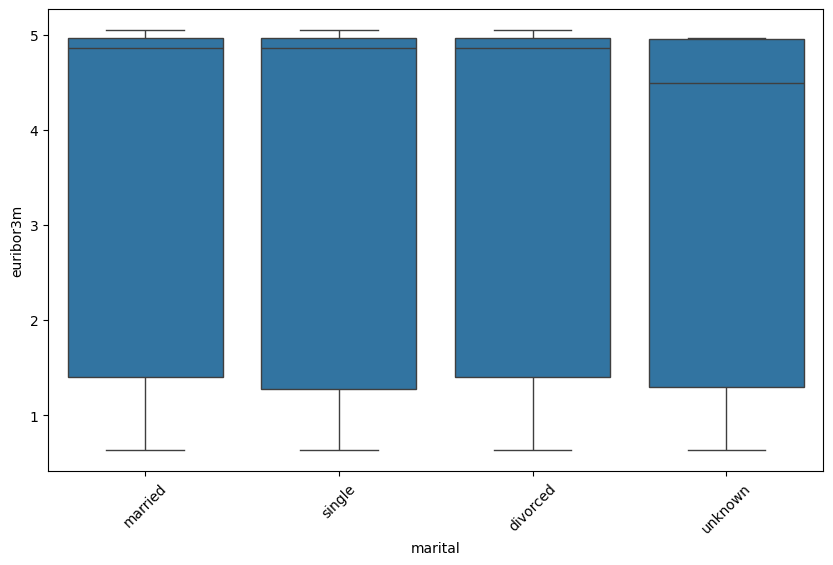

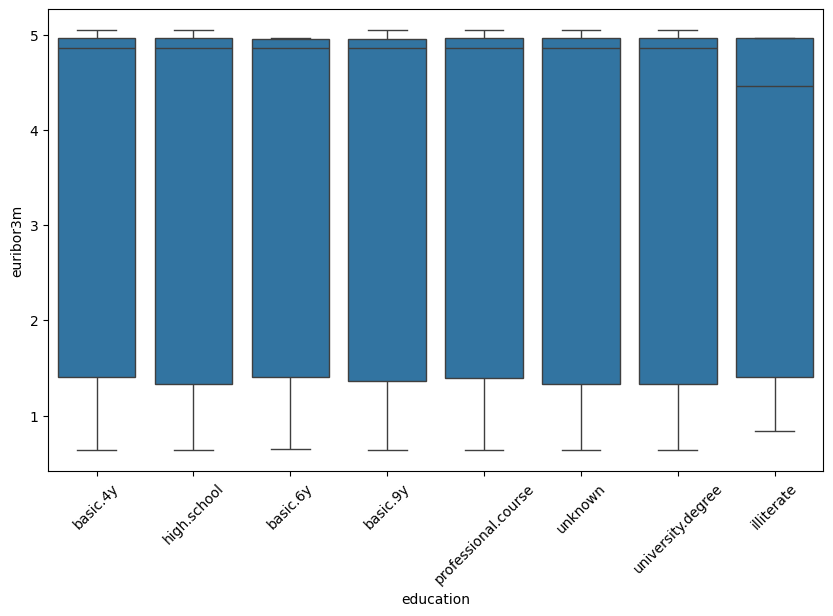

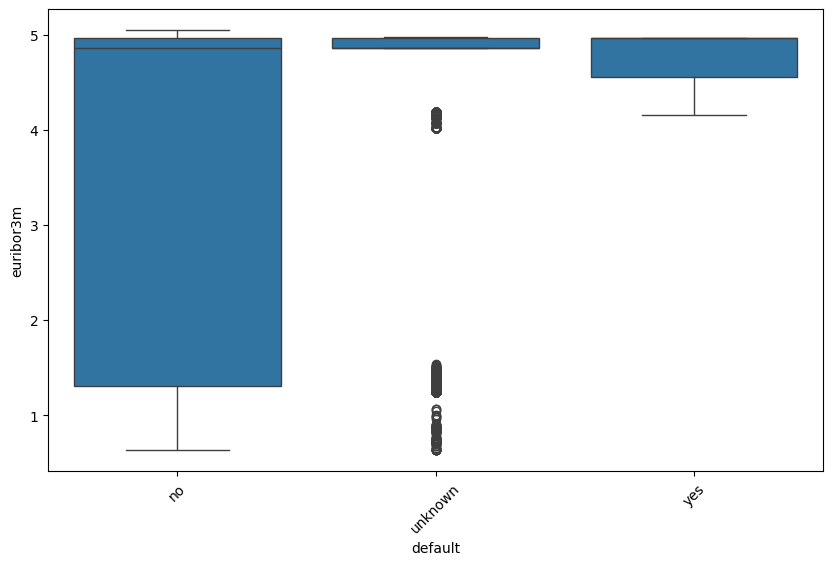

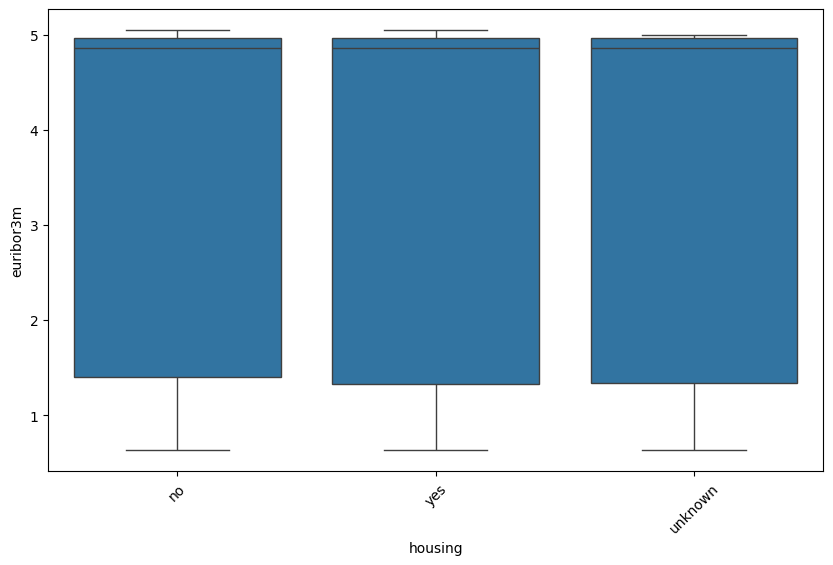

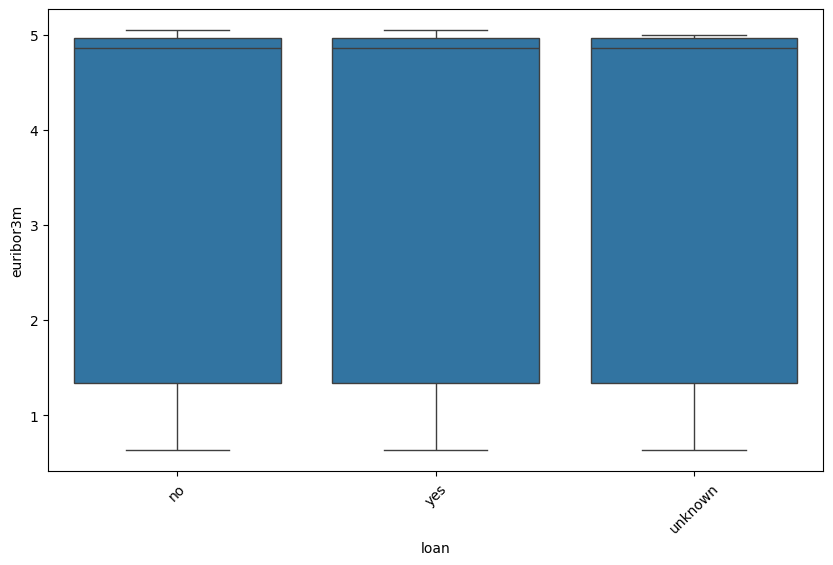

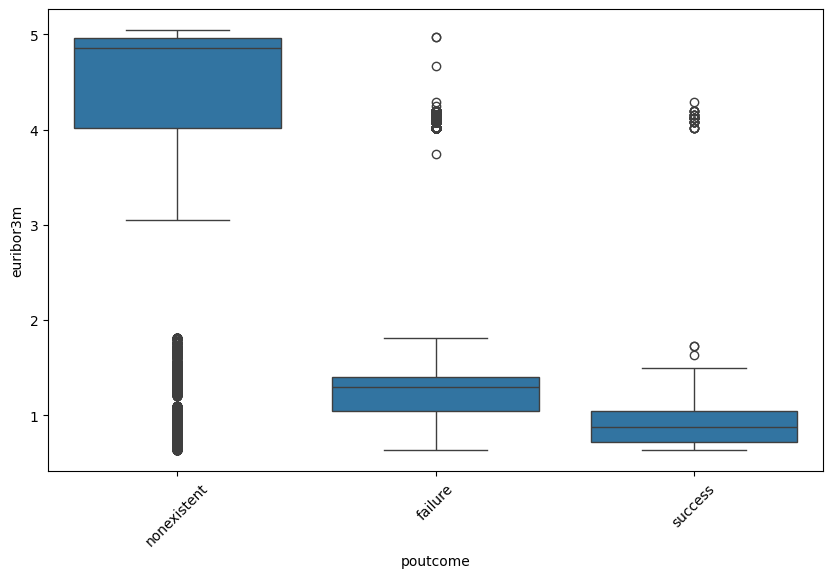

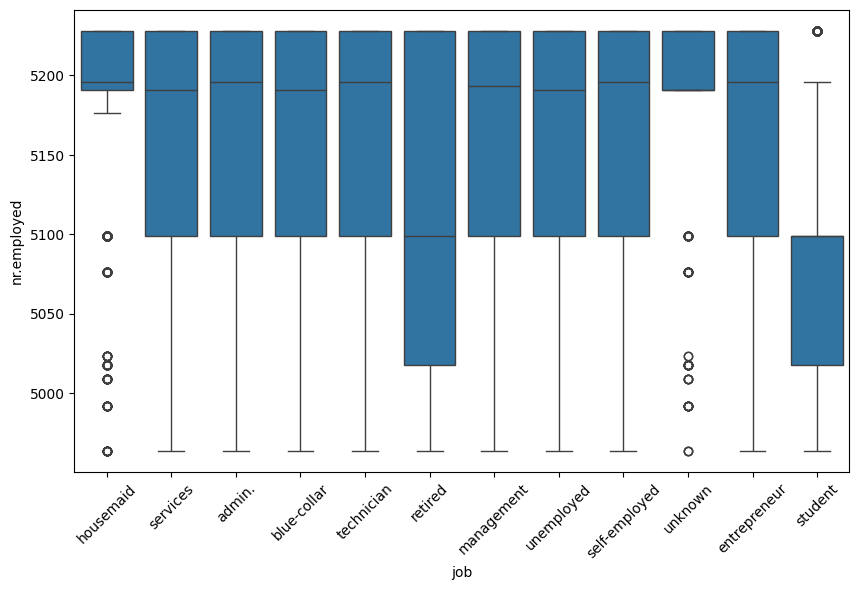

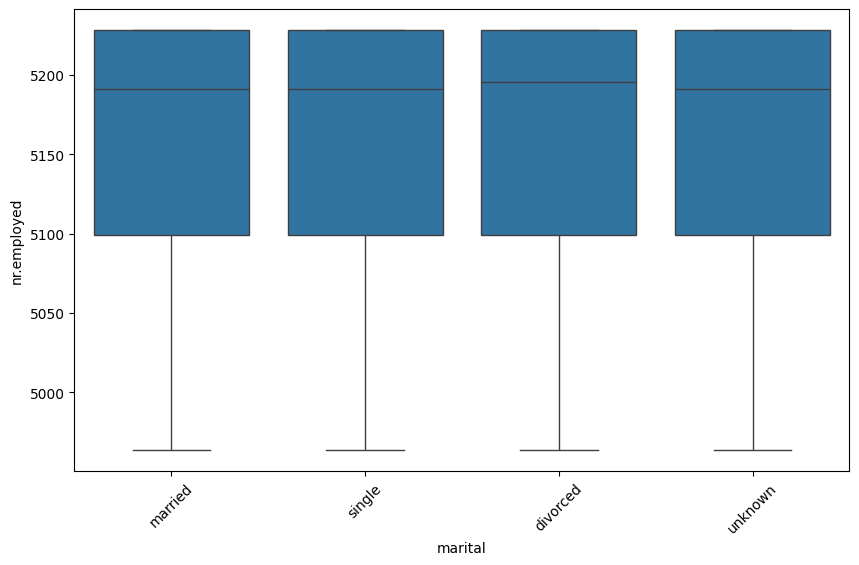

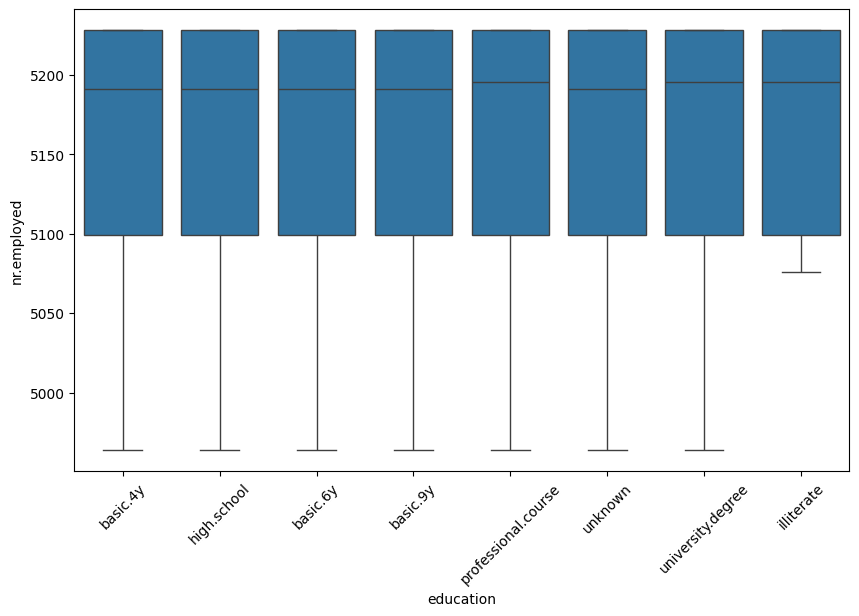

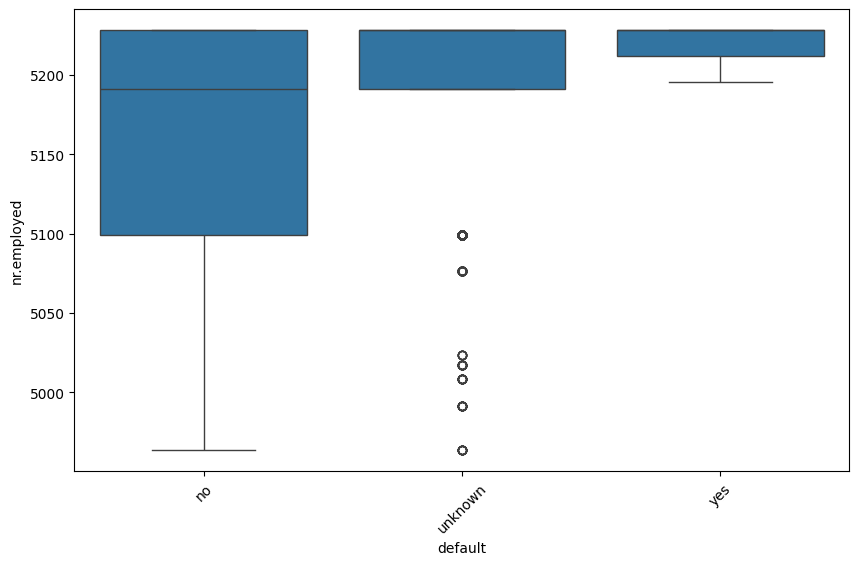

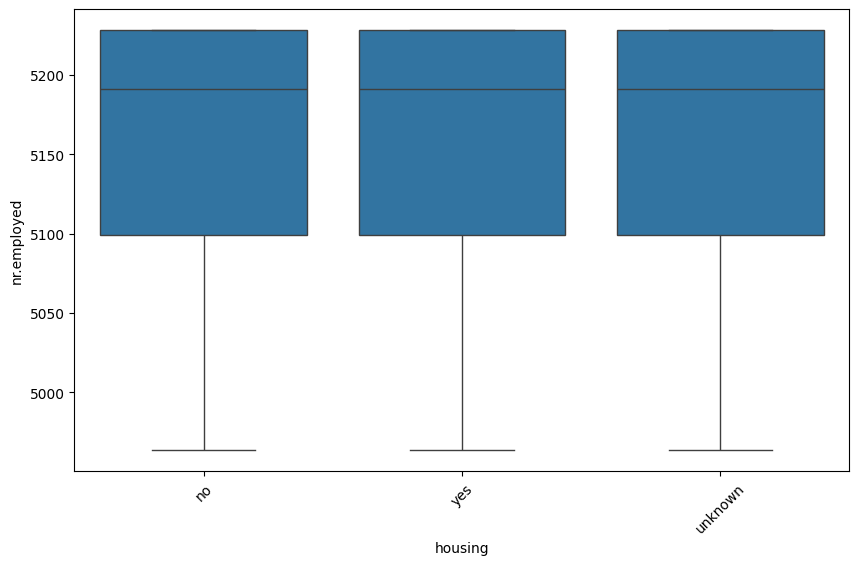

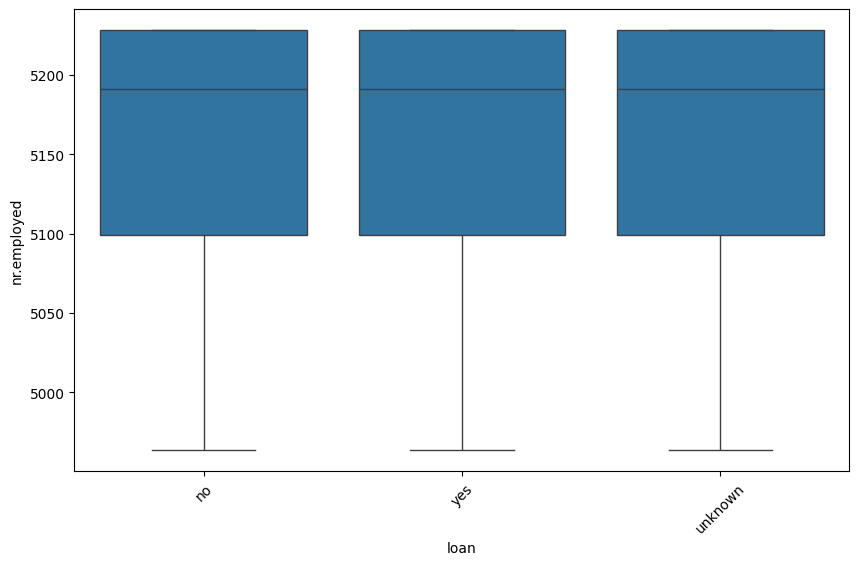

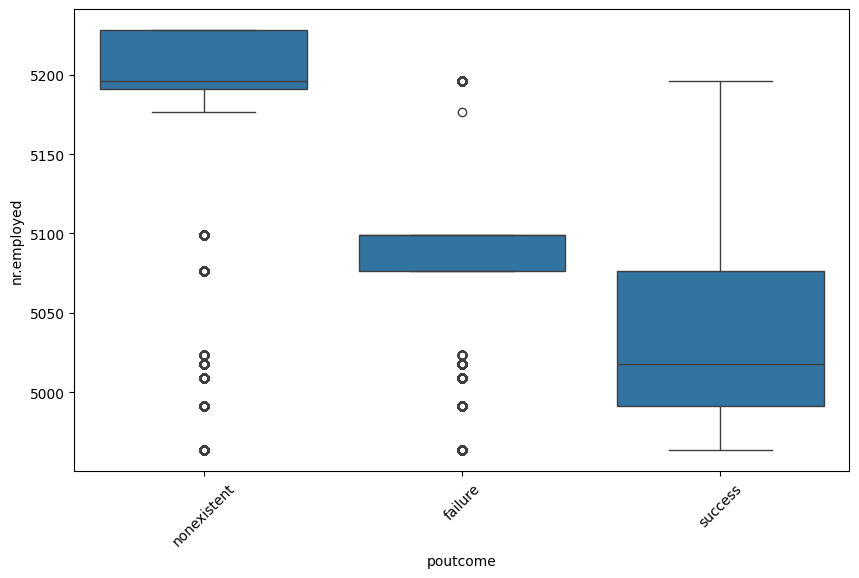

In [ ]:
for num in numerical_cols:
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=num, data=total_data)
        plt.xticks(rotation=45)
        plt.show()


#### Step 3: Build a logistic regression model

You do not need to optimize the hyperparameters. Start by using a default definition and improve it in the next step.



## Logistic Regression Model

#### Step 4: Optimize the previous model

After training the model, if the results are not satisfactory, optimize it using one of the techniques seen above.

> NOTE: Solution: https://github.com/4GeeksAcademy/logistic-regression-project-tutorial/blob/main/solution.ipynb
